## TITLE:  Unveiling the Drivers of Customer Churn: An Analytical Journey to Improve Retention

# Intro

## General

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

#display all columns and rows 
pd.set_option('display.max_columns', None)


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv

churn_data = Telco_churn = pd.read_csv("Telco-Customer-Churn.csv")

# Exploratory Data Analysis: EDA

The goal of manual EDA is to gain a deeper understanding of the data and identify potential problems and opportunities for analysis. By combining basic statistics, visualization techniques, and common sense, you can get a good sense of the data and start developing insights and hypotheses for further analysis.

In [3]:
# Code here

In [4]:
churn_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
churn_data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

In [7]:
churn_data.shape

(7043, 21)

Our data contains 7043 customers with 21 columns containing various customer information that can be summarized as customer’s demographic, account, and subscription information. The "churn" column which is the column we want to predict contains information on whether the customer churned or not.

In [8]:
# Check the data types of each column
print(churn_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
# Coerce the conversion of TotalCharges column to float
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [10]:
# Check the data types of each column
print(churn_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [11]:
# Get summary statistics for all columns in churn_data
summary_stats = churn_data.describe(include=['O'])
summary_stats

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

In [12]:
# Get summary statistics for numeric columns in churn_data
summary_stats = churn_data.describe()
summary_stats

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

#Major observations:

1. 7043 records are available for analysis 

2. 8684.800000 is the maximum Total Charge 

3. 18.800000 is the minimum Total Charge 

4. 118.750000 is the maximum Monthly charge 

5. 18.250000 is the minimum Monthly charge 

6. Average tenure is 32 months 

7. 

### Univatiate Analysis

## Analyzing the churn attribute 

In [13]:
churn_data = churn_data.dropna()

In [14]:
#Counting the number of churn values in churn_data
churn_data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [15]:
#Calculate the percentages of the churn 
100*churn_data['Churn'].value_counts()/len(churn_data['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

###### Visualization of Churn Distribution with Pie Chart using Plotly

In [16]:
churn_dist = churn_data["Churn"].value_counts().to_frame()
churn_dist= churn_dist.reset_index()
churn_dist = churn_dist.rename(columns={'index': 'Category'})
fig = px.pie(churn_dist, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

73.46 % of customers did not churn, and 26.54% of customers did churn.

Having an imbalanced dataset can lead to biased machine learning models. In this case, if we train a model on this imbalanced dataset, it may have a higher accuracy in predicting the majority class (customers who did not churn) but may perform poorly in predicting the minority class (customers who did churn). This is because the model may learn to always predict the majority class since it occurs more frequently in the dataset.

To address this issue, we can use techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both. We can also use algorithms that are specifically designed to handle imbalanced datasets, such as random forest or gradient boosting. It's important to keep in mind that choosing the right approach depends on the specific dataset and problem at hand.

### Exploratory Data Analysis (EDA) of Numeric Columns in churn data using Histogram and Boxplot

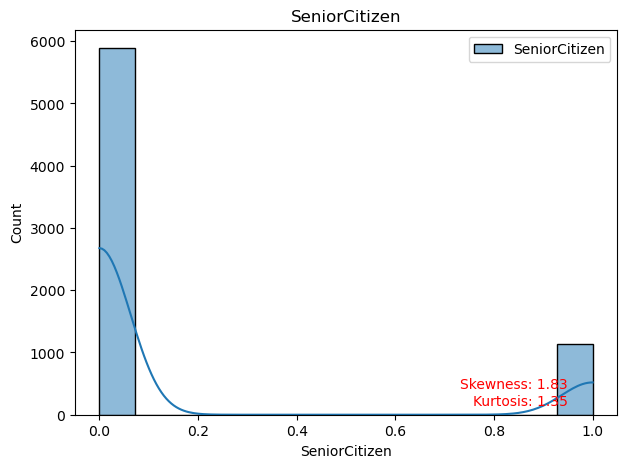

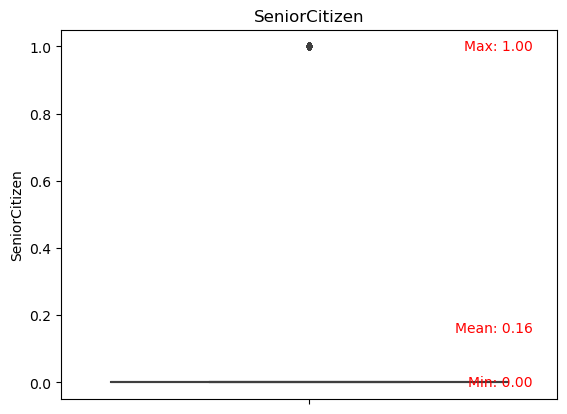

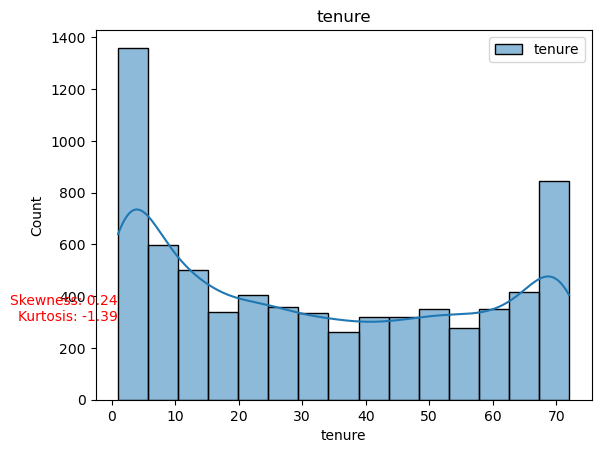

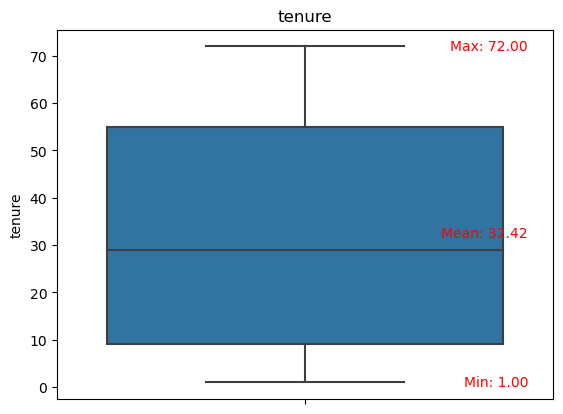

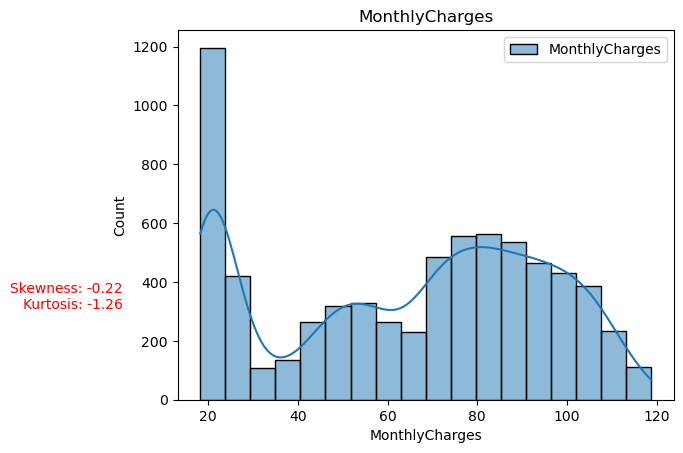

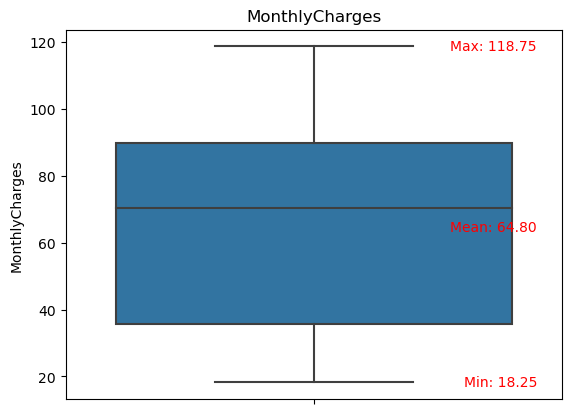

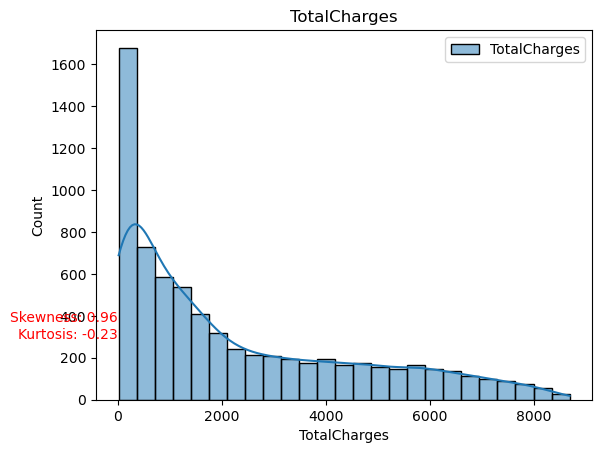

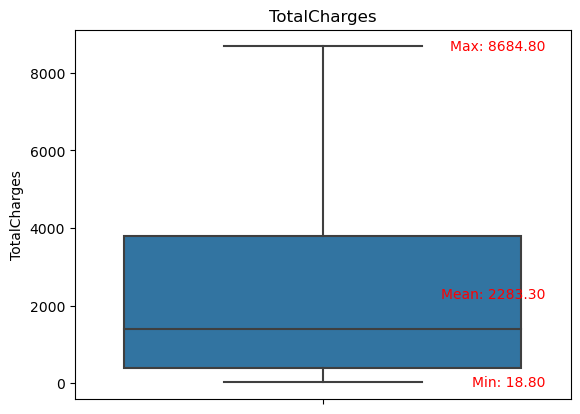

In [17]:
import scipy.stats as stats

# Set figure size for plots
plt.figure(figsize=(7,5))

# Drop missing values from the DataFrame
#churn_data = churn_data.dropna()

# Loop through each column in the DataFrame
for col in churn_data.columns:
    
    # Skip non-numeric columns
    if churn_data[col].dtype == 'object':
        continue
    
    # Calculate skewness and kurtosis of the column
    skewness = stats.skew(churn_data[col])
    kurtosis = stats.kurtosis(churn_data[col])
    
    # Create a histogram of the column
    sns.histplot(data=churn_data, x=col, kde=True, label=col)
    plt.title(col)
    
    # Add a legend to the plot
    plt.legend()
    
    # Add skewness and kurtosis values to the plot
    plt.text(x=0.95, y=350, s=f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}", color='red', ha='right', va='center')
    
    plt.show()
    
    
    # Create a boxplot of the column
    ax = sns.boxplot(data=churn_data, y=col, fliersize=4)
    
    # Add mean value to the boxplot
    mean_val = churn_data[col].mean()
    plt.text(x=0.95, y=mean_val, s=f"Mean: {mean_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    
    # Add max and min values to the boxplot
    max_val = churn_data[col].max()
    min_val = churn_data[col].min()
    plt.text(x=0.95, y=max_val, s=f"Max: {max_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    plt.text(x=0.95, y=min_val, s=f"Min: {min_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    
    # Show outlier points
    for i, val in enumerate(churn_data[col]):
        if val < ax.get_ylim()[0] or val > ax.get_ylim()[1]:
            ax.scatter(i, val, color='r', s=10)
    
    plt.title(col)
    plt.show()


### Exploratory Data Analysis (EDA) of Categorical Columns in churn_data using Countplot

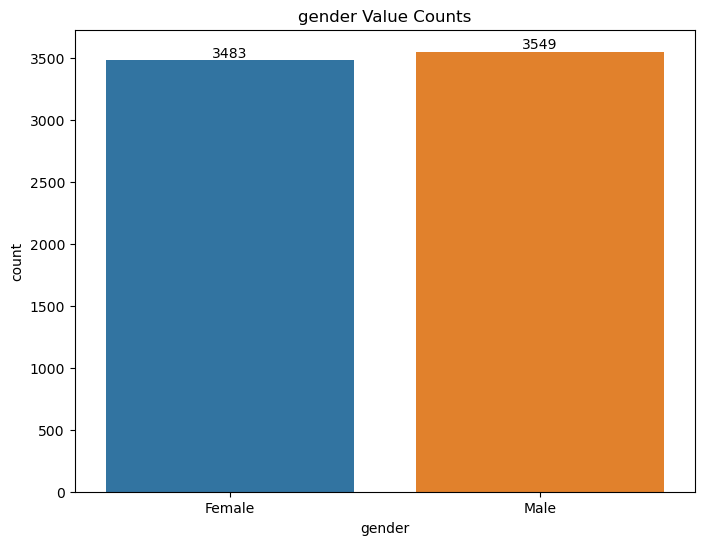

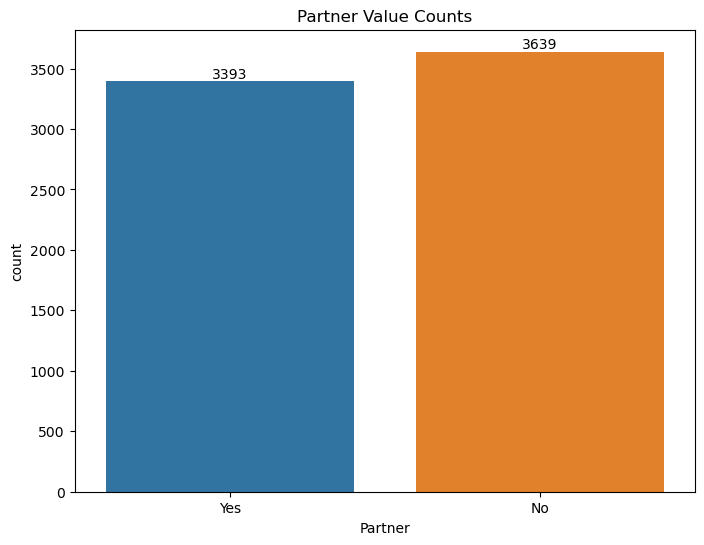

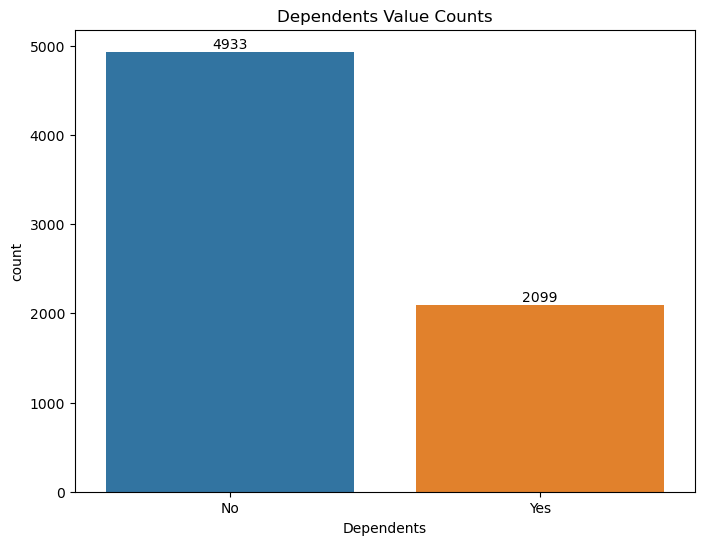

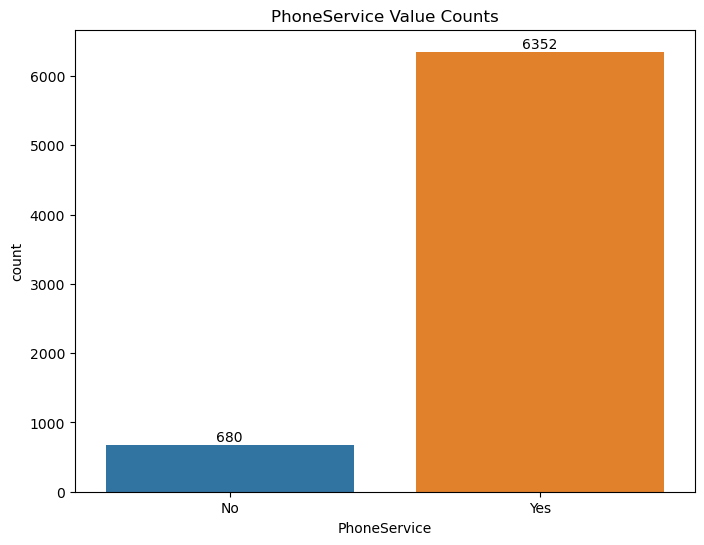

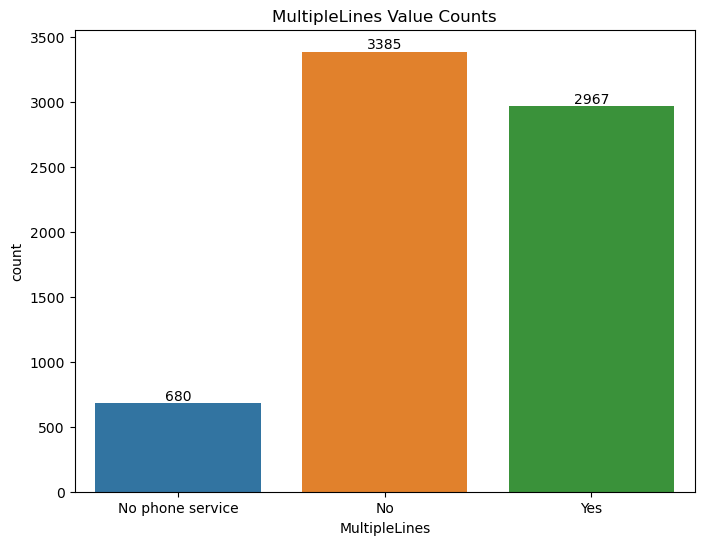

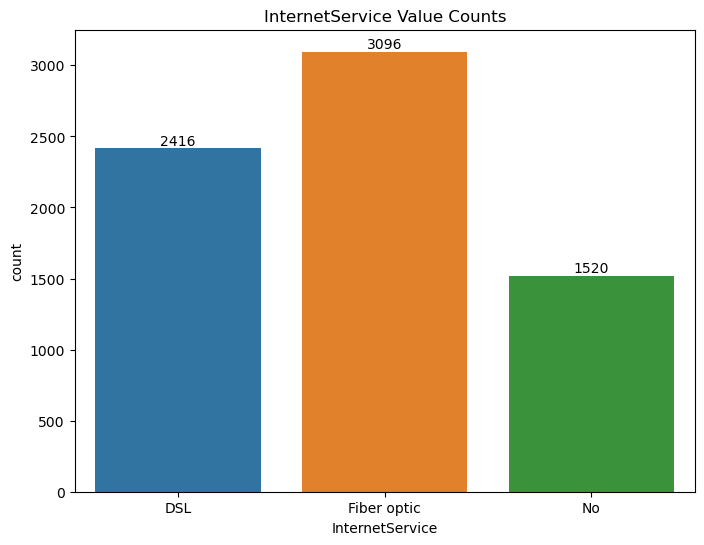

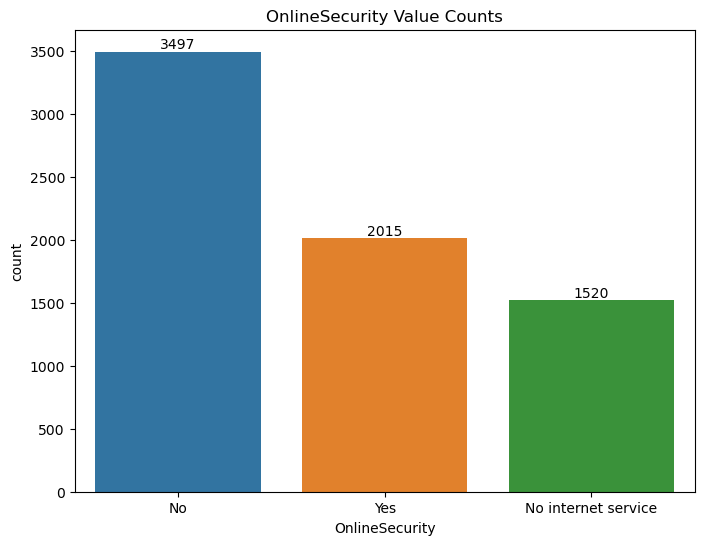

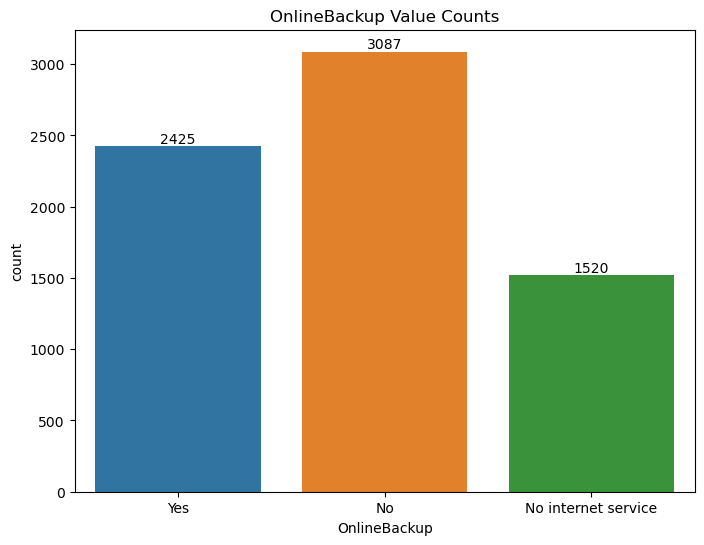

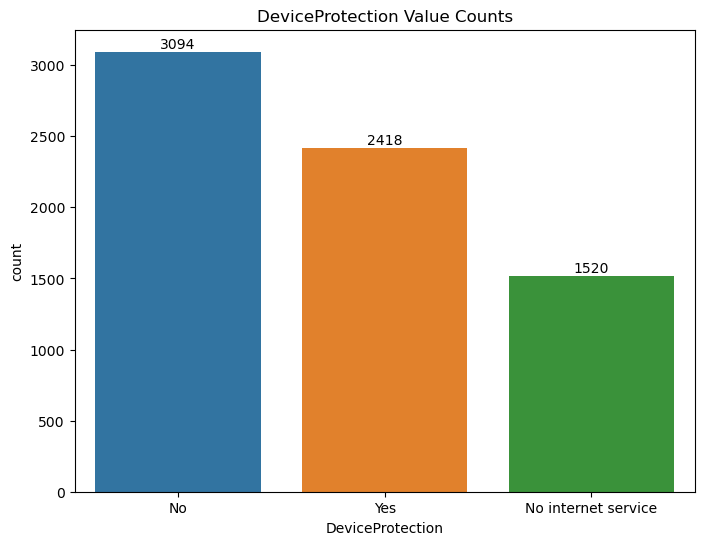

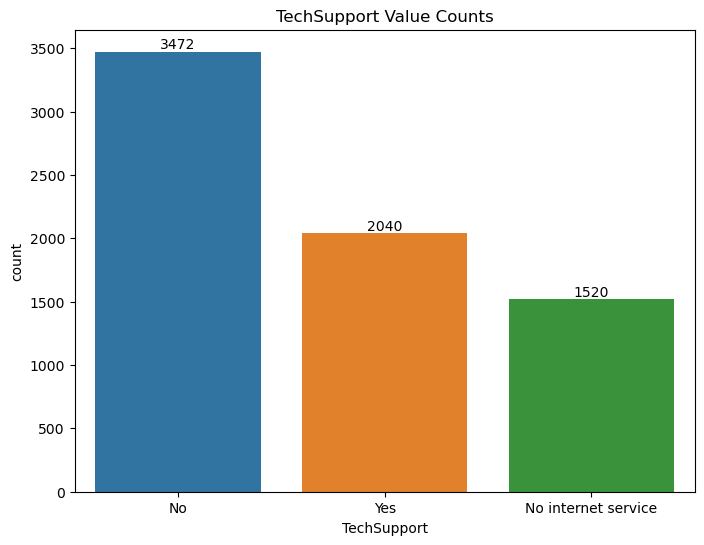

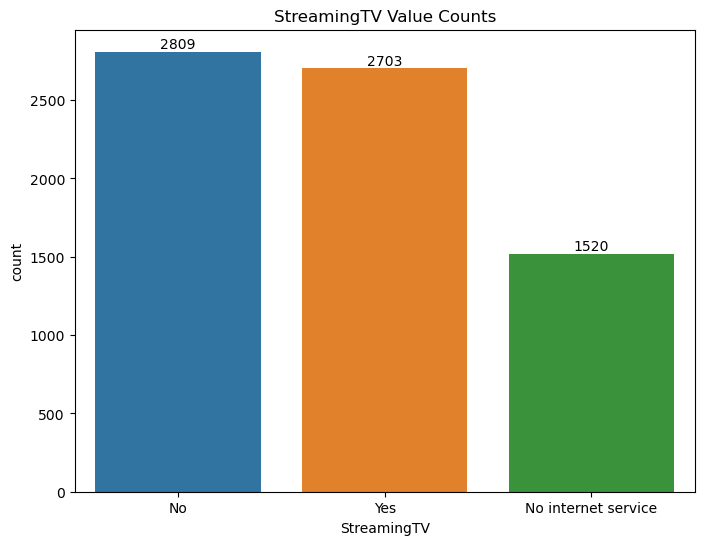

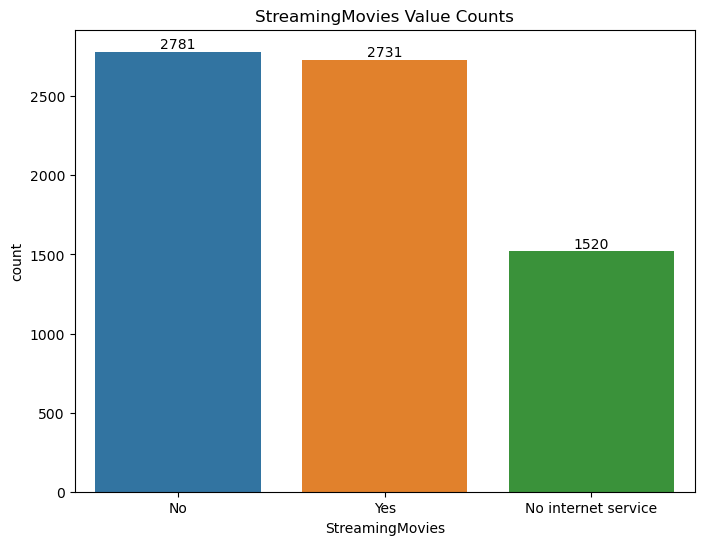

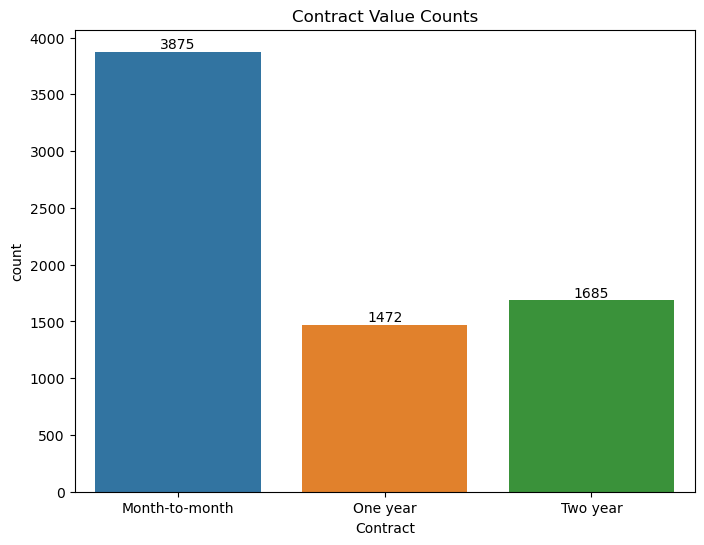

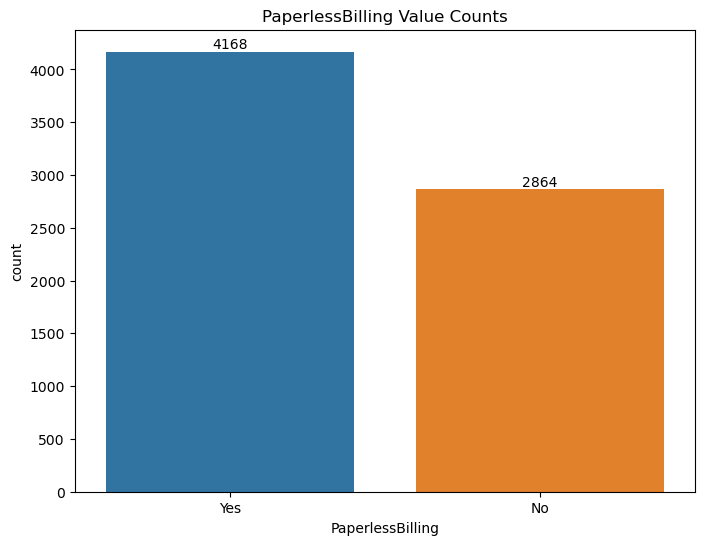

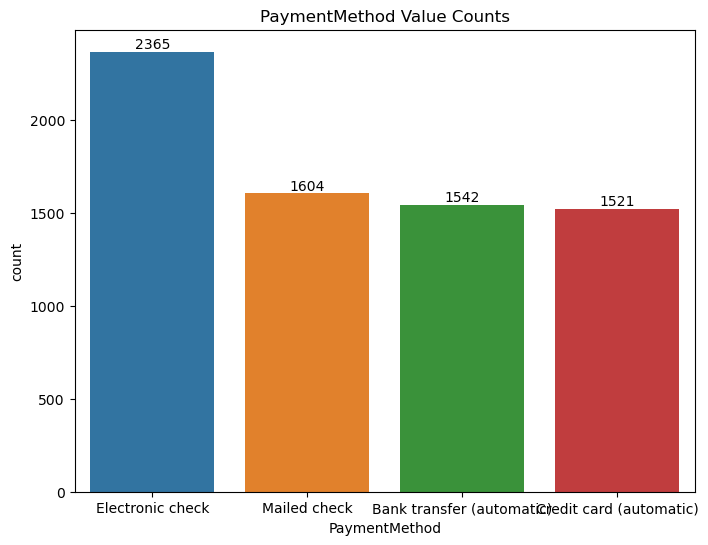

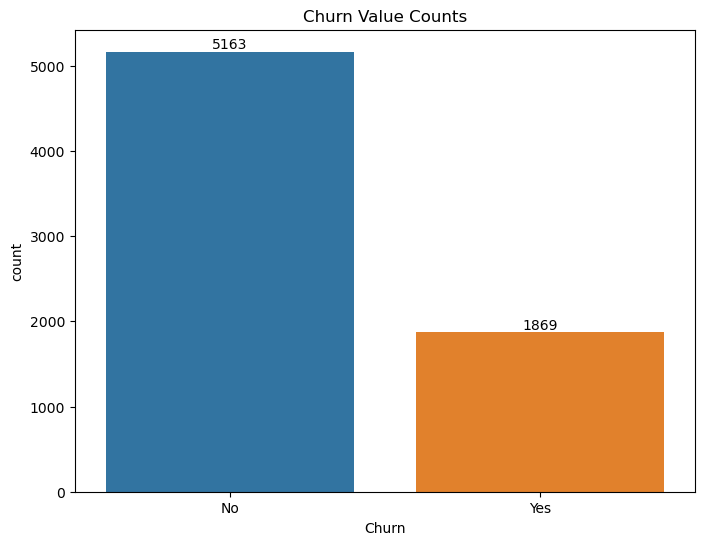

In [18]:
# Drop the 'customerID' column from the churn_data DataFrame
churn_data1 = churn_data.drop("customerID", axis=1)

# Select all columns with object (categorical) data type
obj_cols = churn_data1.select_dtypes(include='object').columns

# Loop through each categorical column in the DataFrame
for col in obj_cols:
    
    # Set the figure size for the countplot
    plt.figure(figsize=(8, 6))
    
    # Create a countplot of the column using seaborn
    ax = sns.countplot(x=col, data=churn_data1)
    
    # Set the title of the countplot
    ax.set_title(f"{col} Value Counts")

    # Add data values to the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, 
                p.get_height(), 
                f"{p.get_height():.0f}", 
                ha='center', 
                va='bottom')

    # Show the countplot
    plt.show()


### Bivariate Analysis

### Violin Plot for Comparing Churn (Yes/No) vrs Monthly charges 

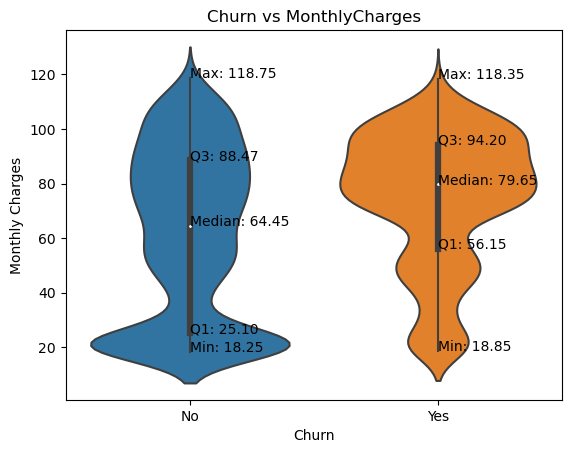

In [19]:
# Create a violin plot
ax = sns.violinplot(x='Churn', y='MonthlyCharges', data=churn_data)

# Add title and y-label
ax.set_title('Churn vs MonthlyCharges')
ax.set_ylabel('Monthly Charges')

# Add statistical values for the spread
for i, category in enumerate(churn_data['Churn'].unique()):
    data = churn_data[churn_data['Churn'] == category]['MonthlyCharges']
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_whisker = data[data <= (q3 + 1.5*iqr)].max()
    lower_whisker = data[data >= (q1 - 1.5*iqr)].min()
    ax.text(i, upper_whisker, f"Max: {upper_whisker:.2f}")
    ax.text(i, q3, f"Q3: {q3:.2f}")
    ax.text(i, median, f"Median: {median:.2f}")
    ax.text(i, q1, f"Q1: {q1:.2f}")
    ax.text(i, lower_whisker, f"Min: {lower_whisker:.2f}")

# Set legend and show plot
#ax.legend(labels=['No Churn', 'Churn'])
plt.show()


### Monthly Charges vs. Total Charges (Correlation Analysis)

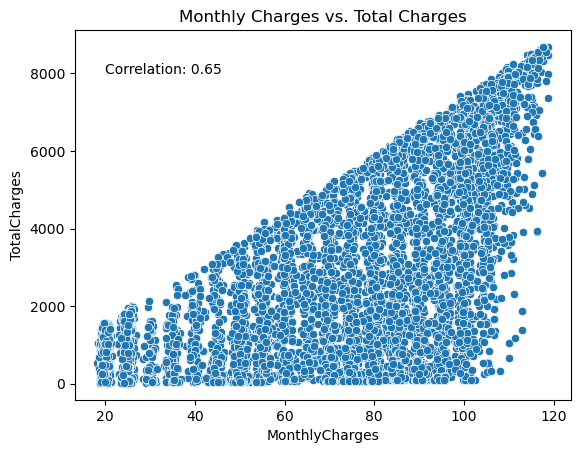

In [20]:
# Calculate correlation between MonthlyCharges and TotalCharges
corr = np.corrcoef(churn_data['MonthlyCharges'], churn_data['TotalCharges'])[0, 1]

# Create scatter plot
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=churn_data)
plt.title('Monthly Charges vs. Total Charges')

# Add correlation value to the plot
plt.text(20, 8000, f'Correlation: {corr:.2f}')

plt.show()


### Tenure vs. Total Charges (Correlation Analysis)

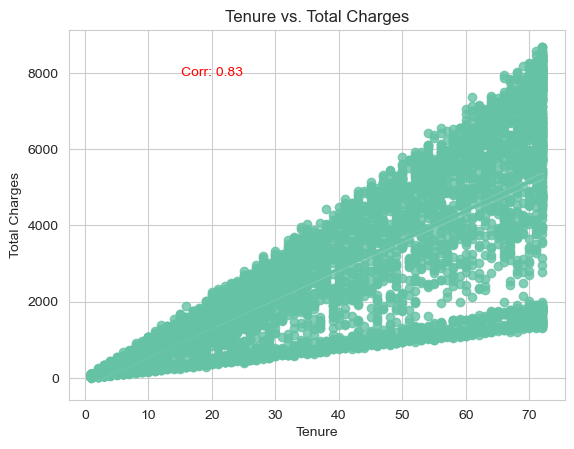

In [252]:
sns.regplot(x='tenure', y='TotalCharges', data=churn_data)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

# Calculate correlation coefficient
corr = churn_data['tenure'].corr(churn_data['TotalCharges'])
corr_text = f'Corr: {corr:.2f}'

# Add correlation value to the plot
plt.text(20, 8000, corr_text, ha='center', va='center', color='red')

plt.show()


### BoxPlot Analysis: Monthly Charges Vrs all Categorical Variables 

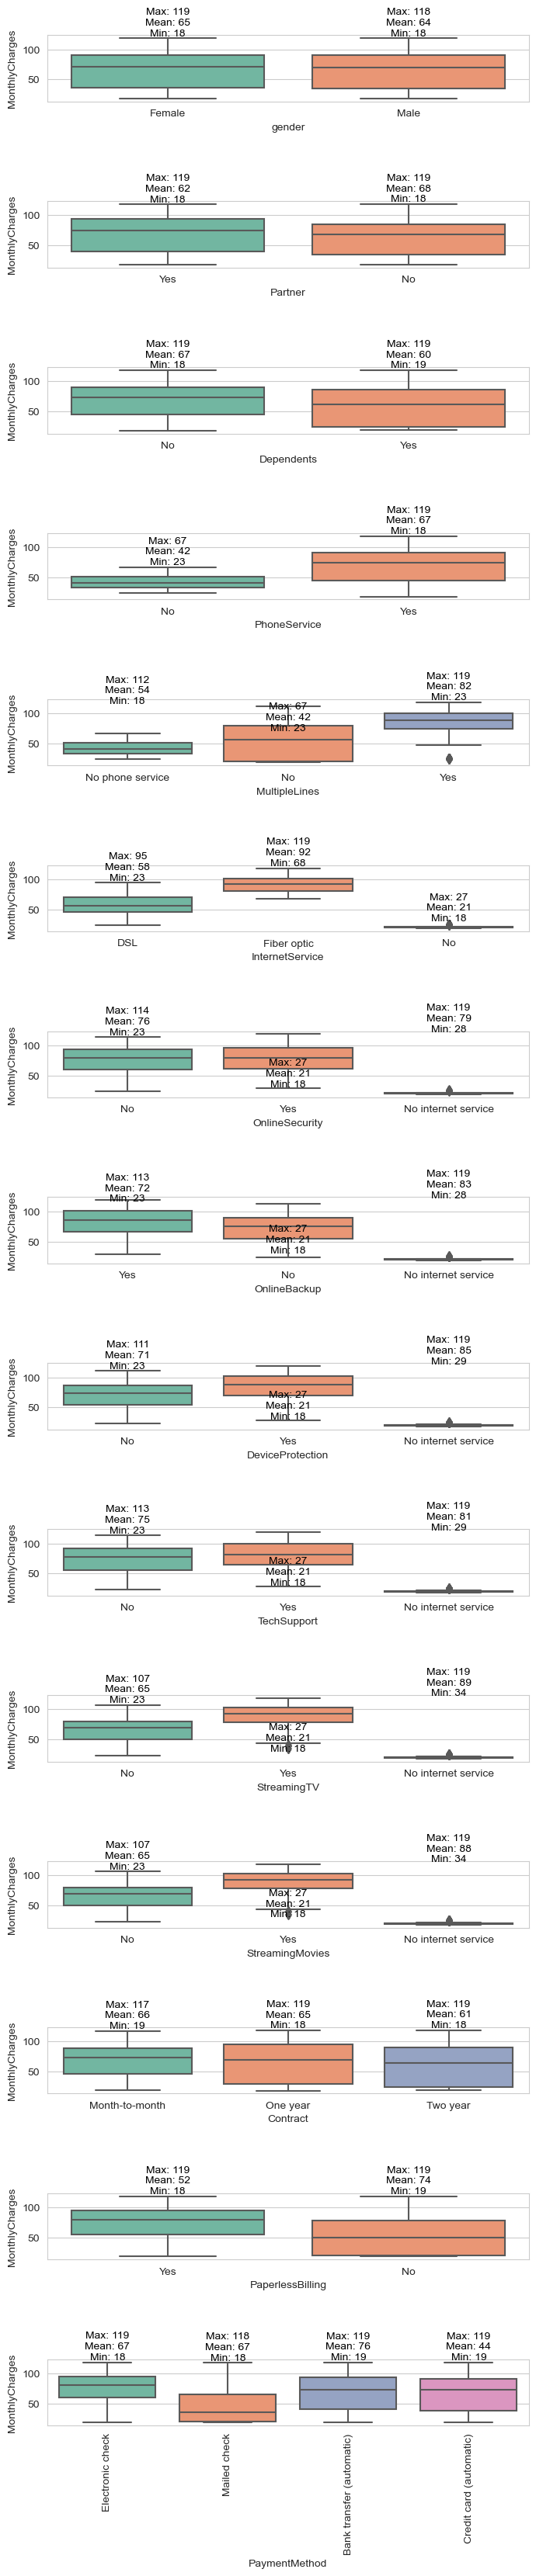

In [253]:
# Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=1.5, hspace=1.5)

# Loop through each categorical column and create a box plot with MonthlyCharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='MonthlyCharges', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add mean, max, and min to the plot
    stats_df = churn_data.groupby(col).agg({'MonthlyCharges': ['mean', 'max', 'min']})
    for idx, label in enumerate(stats_df.index):
        axes[i].text(idx, stats_df.loc[label, ('MonthlyCharges', 'max')], 
                      f"Max: {stats_df.loc[label, ('MonthlyCharges', 'max')]:.0f}\n"
                      f"Mean: {stats_df.loc[label, ('MonthlyCharges', 'mean')]:.0f}\n"
                      f"Min: {stats_df.loc[label, ('MonthlyCharges', 'min')]:.0f}", 
                      ha='center', va='bottom', color='black')
    
plt.xticks(rotation=90)
    
# Display the plot
plt.show()


### BoxPlot Analysis: Tenure Vrs all Categorical Variables 

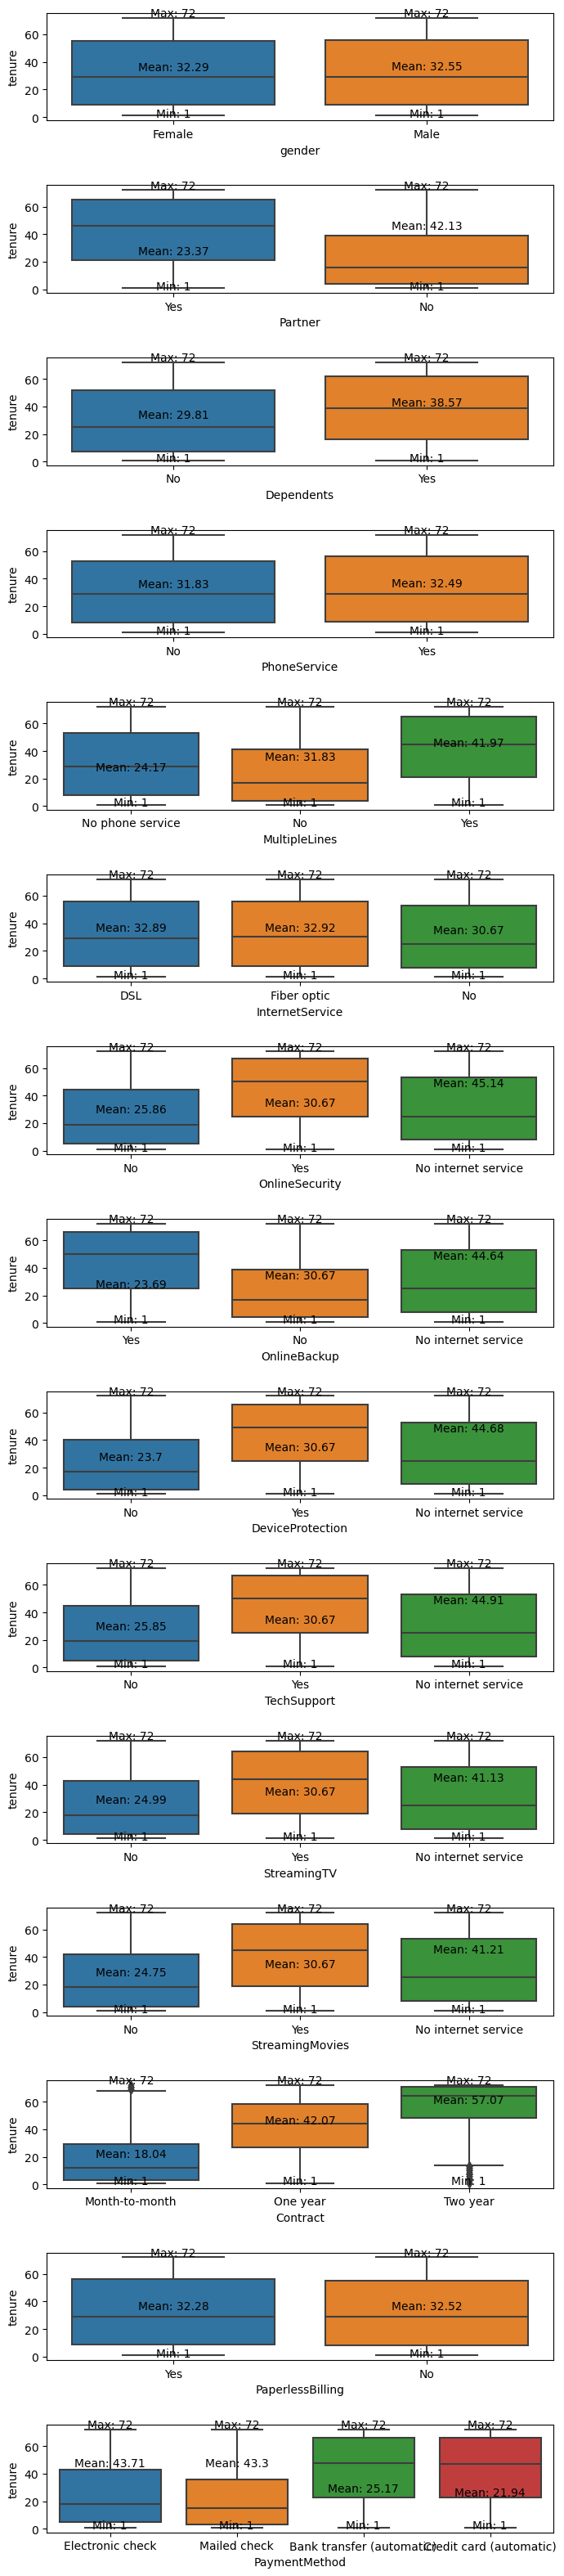

In [23]:
#Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

#Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

#Loop through each categorical column and create a box plot with tenure
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='tenure', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    # Add statistical values to the plot
    mean = round(churn_data.groupby(col)['tenure'].mean(), 2)
    max_val = churn_data.groupby(col)['tenure'].max()
    min_val = churn_data.groupby(col)['tenure'].min()
    
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
    #Display the plot
plt.show()


### BoxPlot Analysis: TotalCharges Vrs all Categorical Variables 

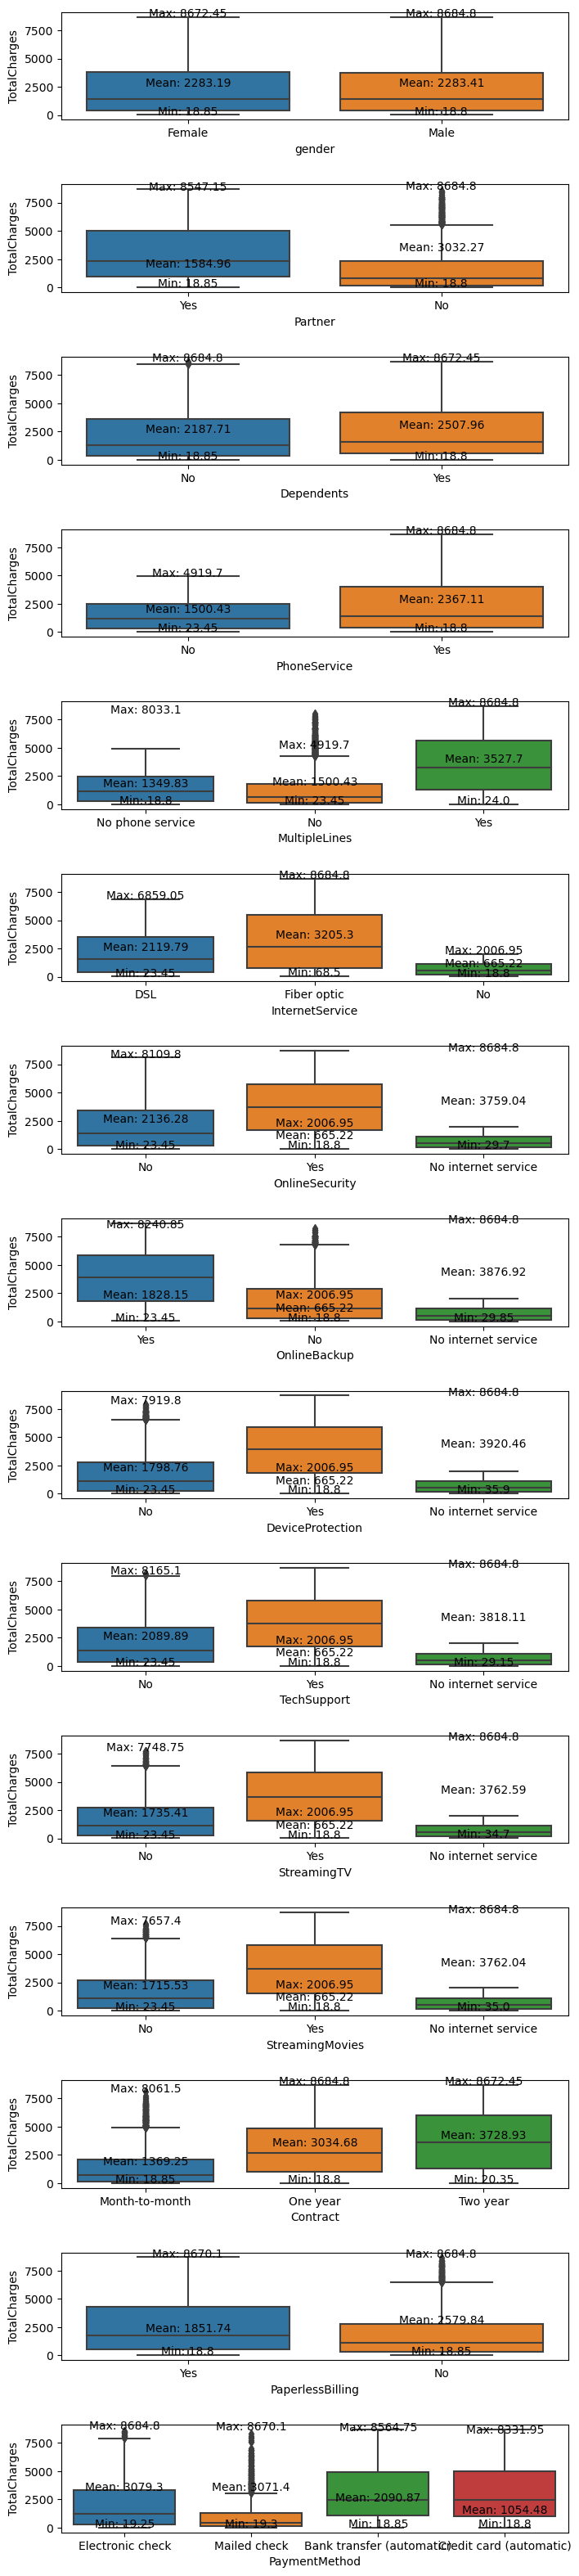

In [24]:
# Create a list of all categorical columns except Churn and CustomerID
cat_cols = churn_data.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Loop through each categorical column and create a box plot with TotalCharges
for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y='TotalCharges', data=churn_data, ax=axes[i])
    axes[i].set_xlabel(col)
    
    # Add data labels above each figure
    mean = round(churn_data.groupby(col)['TotalCharges'].mean(), 2)
    max_val = churn_data.groupby(col)['TotalCharges'].max()
    min_val = churn_data.groupby(col)['TotalCharges'].min()
    
        
    for j in range(len(mean)):
        axes[i].text(j, max_val[j]+1, f'Max: {max_val[j]}', ha='center')
        axes[i].text(j, mean[j], f'Mean: {mean[j]}', ha='center', va='bottom')
        axes[i].text(j, min_val[j]-1, f'Min: {min_val[j]}', ha='center')
    
# Display the plot
plt.show()


### Multivariate Analaysis 

### Correlation between all the numerical attributes

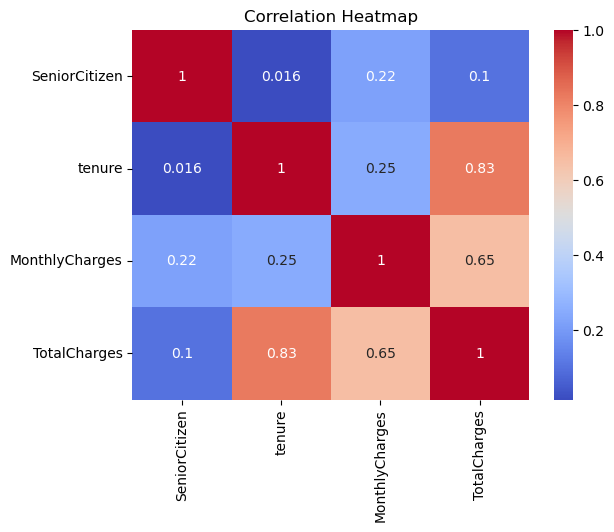

In [25]:
# Heatmap to visualize the correlation between all the numerical attributes in the dataset.

numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = churn_data[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Factor Analysis using correlation 

In [26]:
from sklearn.preprocessing import LabelEncoder

df = churn_data.copy()

# Convert the Churn column to numerical using label encoding
le = LabelEncoder()

df['Churn_encoded'] = le.fit_transform(df['Churn'])

# Compute the correlation between all the numerical attributes and the target variable (Churn_encoded)
correlations = df.corr()['Churn_encoded'].sort_values(ascending=False)

print(correlations)


Churn_encoded     1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn_encoded, dtype: float64


### Monthly charges for each combination of internet service type and contract type

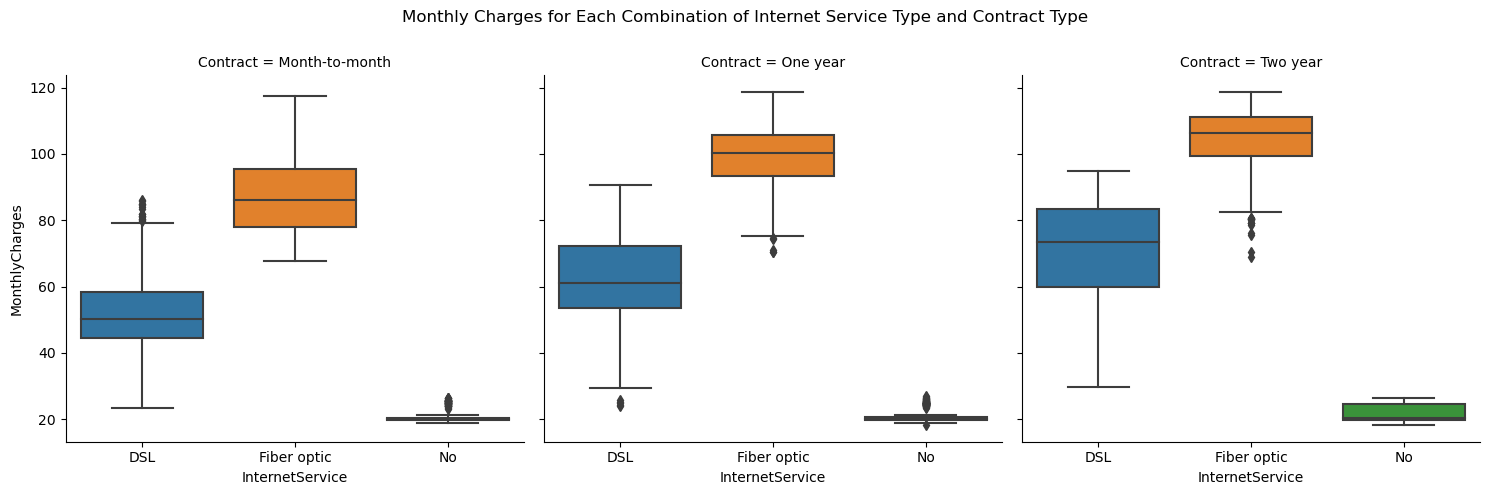

In [27]:
# Box plot of the monthly charges for each combination of internet service type and contract type.

# Filter the data for only the relevant columns
internet_contract = churn_data[['InternetService', 'Contract', 'MonthlyCharges']]

# Create the box plot
sns.catplot(x='InternetService', y='MonthlyCharges', col='Contract', data=internet_contract, kind='box')

# Add plot titles and labels
plt.suptitle('Monthly Charges for Each Combination of Internet Service Type and Contract Type')
plt.subplots_adjust(top=0.85)
plt.show()


### Comparison of the number of customers who churned and did not churn, grouped by internet service type and payment method.

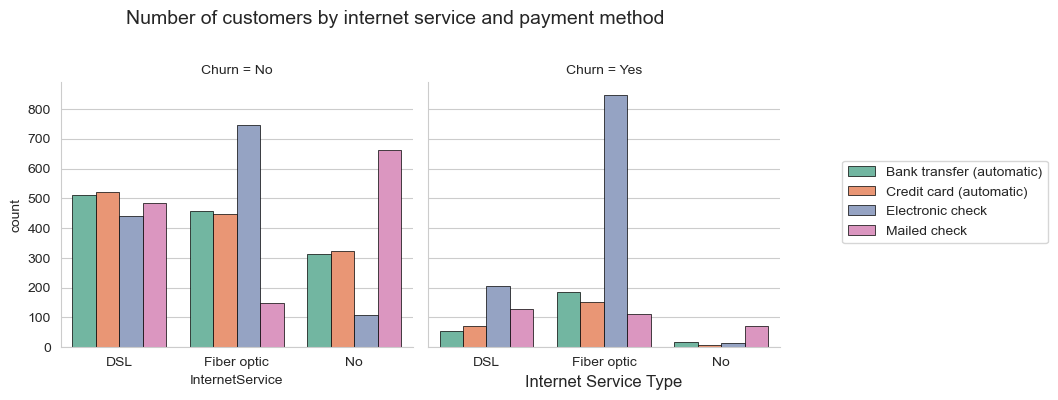

In [28]:
#Stacked bar chart to compare the number of customers who churned and did not churn, grouped by internet service type and payment method.

# Subset the data to include only relevant columns
churn_data_sub = churn_data[['Churn', 'InternetService', 'PaymentMethod']]

# Group by the variables and count the number of occurrences
churn_data_grouped = churn_data_sub.groupby(['Churn', 'InternetService', 'PaymentMethod']).size().reset_index(name='count')

# Create a stacked bar chart
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.catplot(x='InternetService', y='count', hue='PaymentMethod', col='Churn', data=churn_data_grouped, kind='bar', height=4, aspect=1, legend=False, edgecolor='black', linewidth=0.5)

# Set the chart title and axes labels
plt.subplots_adjust(top=0.8)
plt.suptitle('Number of customers by internet service and payment method', fontsize=14)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')


### HYPOTHESIS 

1. The likelihood of a customer leaving the organization is influenced by their contract type

NULL: Customers on 2-year contracts are less likely to churn 

Alternate: Customers on 2-year contracts are more likely to churn 

### HYPOTHESIS TESTING 

Chi-Squared: 1179.5458287339445
P-Value: 7.326182186265472e-257
Degrees of Freedom: 2
Expected Frequencies:
 [[2845.08319113 1029.91680887]
 [1080.76450512  391.23549488]
 [1237.15230375  447.84769625]]


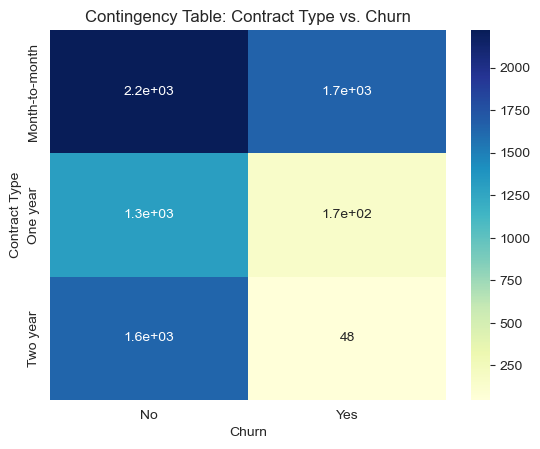

In [29]:
from scipy.stats import chi2_contingency

# Create a contingency table of contract type and churn
cont_table = pd.crosstab(churn_data['Contract'], churn_data['Churn'])

# Conduct the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table, annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.title('Contingency Table: Contract Type vs. Churn')

# Display the plot
plt.show()


The null hypothesis is that there is no association between the 'Contract' and 'Churn' variables (i.e., customers on 2-year contracts are equally likely to churn as customers on other contract types). The alternate hypothesis is that there is an association between the two variables (i.e., customers on 2-year contracts are more or less likely to churn than customers on other contract types).

If the p-value is less than our significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. If the p-value is greater than our significance level, we fail to reject the null hypothesis.

The heatmap visualizes the contingency table by coloring each cell with a different color based on the value in the cell. The annotation in each cell shows the count of observations in that particular category.

In the case of a hypothesis test, the heat map can provide an easy way to see if there is a clear relationship between the two categorical variables in the contingency table. For example, if there is a pattern where one category tends to have higher counts than the other, it suggests that the two variables may be related.

#### BUSINESS QUESTIONS:  

###### Demographic Factors:

- What is the gender distribution of customers?
- What is the distribution of customers based on their senior citizen status?
- What is the distribution of customers based on their partnership status?
- What is the distribution of customers based on their dependents status?

###### Services Availed:

- What is the distribution of customers based on their phone service status?
- What is the distribution of customers based on their multiple lines status?
- What is the distribution of customers based on their internet service provider?
- What is the distribution of customers based on their online security status?
- What is the distribution of customers based on their online backup status?
- What is the distribution of customers based on their device protection status?
- What is the distribution of customers based on their tech support status?
- What is the distribution of customers based on their streaming TV status?
- What is the distribution of customers based on their streaming movies status?

###### Contract Terms:

- What is the distribution of customers based on their contract term?
- Is there a relationship between contract term and customer churn?

###### Payment Method:

- What is the distribution of customers based on their payment method?
- Is there a relationship between payment method and customer churn?

###### Monthly Charges:

- Is there a relationship between monthly charges and customer churn?

###### churn rate:

- Which gender has a higher churn rate?
- Is there a difference in churn rate between senior citizens and non-senior citizens?
- How does the churn rate vary by internet service provider?
- Do customers with phone service only have a higher or lower churn rate compared to those with additional services like internet or TV streaming?
- Is there a difference in churn rate based on payment method?
- Do customers who have multiple lines have a higher or lower churn rate compared to those with single lines?
- What is the churn rate for customers who have paperless billing vs. those who do not?

# Answering Business Questions

## Demographic Factors:

### 1. What is the gender distribution of customers?

In [30]:
df = churn_data.copy()

# Count the number of customers by gender
gender_counts = df["gender"].value_counts()

# Print the gender distribution
print("Gender Distribution:")
print(gender_counts)

Gender Distribution:
Male      3549
Female    3483
Name: gender, dtype: int64


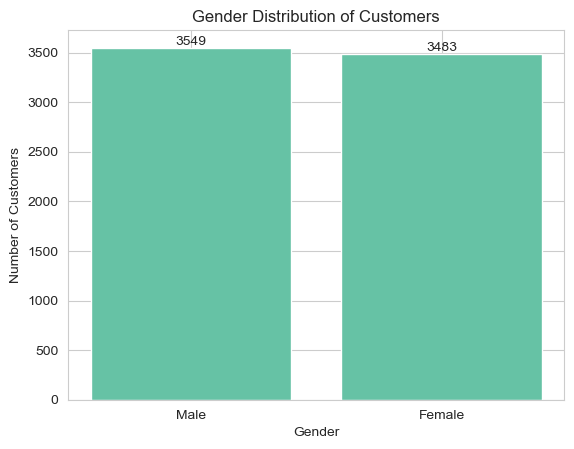

In [254]:
# Visualize the gender distribution as a bar plot
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")

# Add the data values to the plot
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


### 2.  What is the distribution of customers based on their senior citizen status?

In [32]:
# Count the number of customers by senior citizen status
senior_counts = df["SeniorCitizen"].value_counts()

# Print the distribution of customers based on their senior citizen status
print("Senior Citizen Distribution of Customers:\n")
print(senior_counts)

Senior Citizen Distribution of Customers:

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


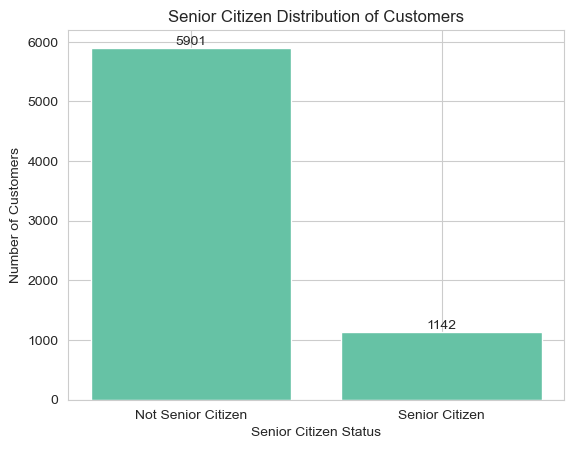

In [257]:
# Count the number of customers by senior citizen status
senior_counts = df["SeniorCitizen"].value_counts()

# Visualize the senior citizen distribution as a bar plot
plt.bar(["Not Senior Citizen", "Senior Citizen"], senior_counts.values)
plt.title("Senior Citizen Distribution of Customers")
plt.xlabel("Senior Citizen Status")
plt.ylabel("Number of Customers")

# Add the data values to the plot
for i, v in enumerate(senior_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### 3. What is the distribution of customers based on their partnership status?

In [258]:
# Count the number of customers by partnership status
partner_counts = df["Partner"].value_counts()

# Print the distribution of customers based on their partnership status
print("Partnership Distribution of Customers:\n")
print(partner_counts)

Partnership Distribution of Customers:

No     3641
Yes    3402
Name: Partner, dtype: int64


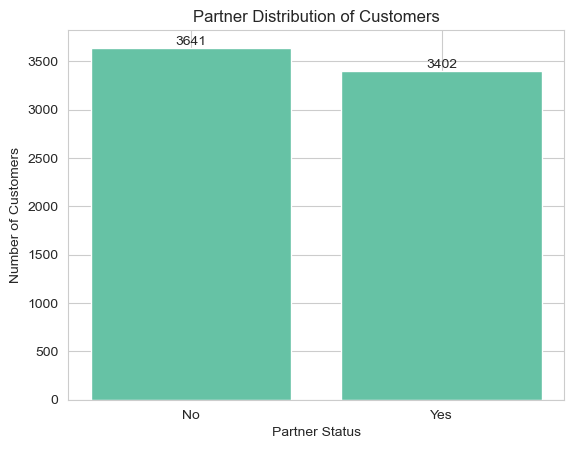

In [259]:
# Count the number of customers by partnership status
partner_counts = df["Partner"].value_counts()

# Visualize the partnership distribution as a bar plot
plt.bar(partner_counts.index, partner_counts.values)
plt.title("Partner Distribution of Customers")
plt.xlabel("Partner Status")
plt.ylabel("Number of Customers")

# Add the data values to the plot
for i, v in enumerate(partner_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### 4. What is the distribution of customers based on their dependents status?

In [36]:
# Count the number of customers by dependents status
dependents_counts = df["Dependents"].value_counts()

# Print the distribution of customers based on their dependents status
print("Dependents Distribution of Customers:\n")
print(dependents_counts)

Dependents Distribution of Customers:

No     4933
Yes    2099
Name: Dependents, dtype: int64


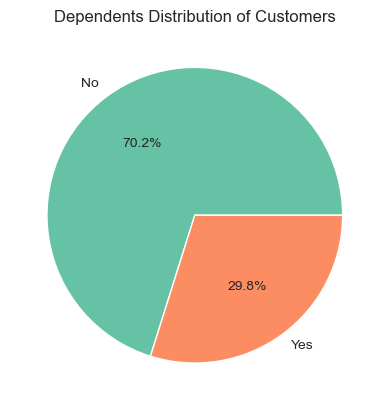

In [37]:
# Count the number of customers by dependents status
dependents_counts = df["Dependents"].value_counts()

# Visualize the dependents distribution as a pie chart
plt.pie(dependents_counts.values, labels=dependents_counts.index, autopct='%1.1f%%')
plt.title("Dependents Distribution of Customers")
plt.show()

## Services Availed:

### 1. What is the distribution of customers based on their phone service status?

In [38]:
# Count the number of customers by phone service status
phone_service_counts = df["PhoneService"].value_counts()

# Print the distribution of customers based on their phone service status
print("Phone Service Distribution of Customers:\n")
print(phone_service_counts)

Phone Service Distribution of Customers:

Yes    6352
No      680
Name: PhoneService, dtype: int64


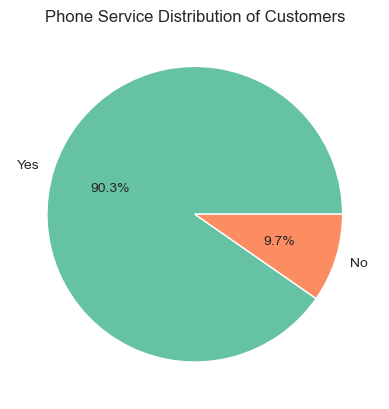

In [39]:
# Count the number of customers by phone service status
phone_service_counts = df["PhoneService"].value_counts()

# Visualize the phone service distribution as a pie chart
plt.pie(phone_service_counts.values, labels=phone_service_counts.index, autopct='%1.1f%%')
plt.title("Phone Service Distribution of Customers")
plt.show()

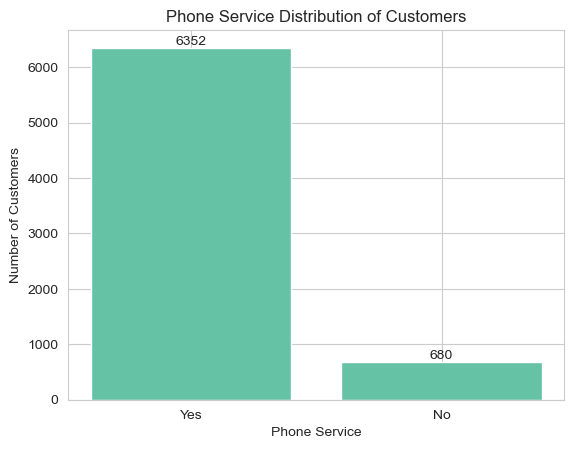

In [260]:
# Visualize the phone service distribution as a bar plot
plt.bar(phone_service_counts.index, phone_service_counts.values)
plt.title("Phone Service Distribution of Customers")
plt.xlabel("Phone Service")
plt.ylabel("Number of Customers")
# Add the data values to the plot
for i, v in enumerate(phone_service_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### 2. What is the distribution of customers based on their multiple lines status?

In [41]:
# Count the number of customers by multiple lines status
multiple_lines_counts = df["MultipleLines"].value_counts()
multiple_lines_counts


No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

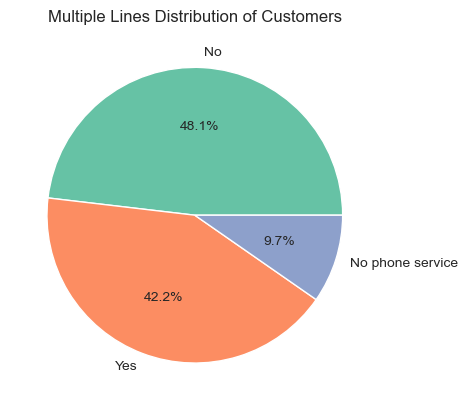

In [42]:
# Visualize the multiple lines distribution as a pie chart
plt.pie(multiple_lines_counts.values, labels=multiple_lines_counts.index, autopct='%1.1f%%')
plt.title("Multiple Lines Distribution of Customers")
plt.show()

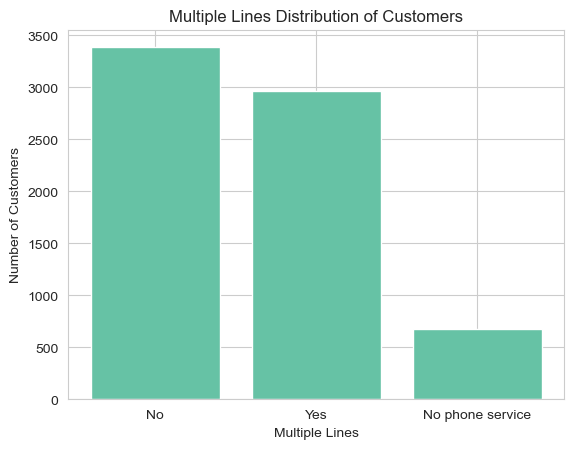

In [43]:
# Visualize the multiple lines distribution as a bar plot
plt.bar(multiple_lines_counts.index, multiple_lines_counts.values)
plt.title("Multiple Lines Distribution of Customers")
plt.xlabel("Multiple Lines")
plt.ylabel("Number of Customers")
plt.show()

### 3. What is the distribution of customers based on their internet service provider?

In [44]:
# Count the number of customers by internet service provider
internet_service_counts = df["InternetService"].value_counts()
internet_service_counts

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

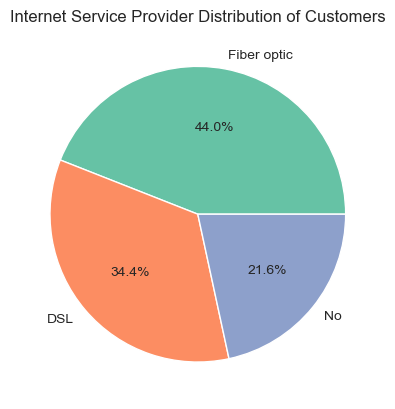

In [45]:
# Visualize the internet service provider distribution as a pie chart
plt.pie(internet_service_counts.values, labels=internet_service_counts.index, autopct='%1.1f%%')
plt.title("Internet Service Provider Distribution of Customers")
plt.show()

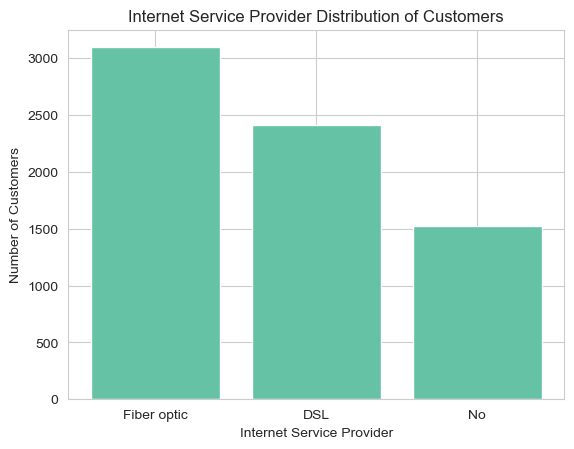

In [46]:
# Visualize the internet service provider distribution as a bar plot
plt.bar(internet_service_counts.index, internet_service_counts.values)
plt.title("Internet Service Provider Distribution of Customers")
plt.xlabel("Internet Service Provider")
plt.ylabel("Number of Customers")
plt.show()

### 4. What is the distribution of customers based on their online security status?

In [47]:
# Count the number of customers by online security status
online_security_counts = df["OnlineSecurity"].value_counts()

# Print the counts for each category
print(online_security_counts)

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


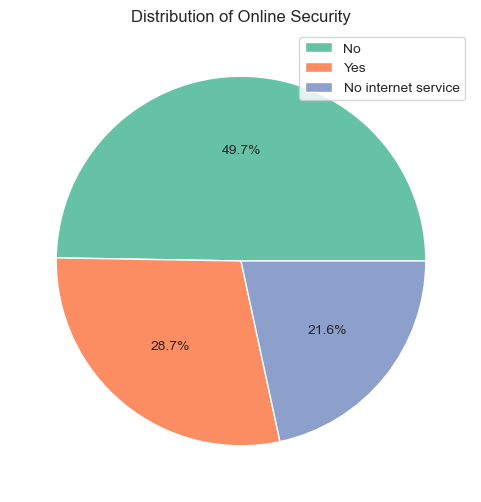

In [48]:
# Create a pie plot of the distribution
plt.figure(figsize=(6, 6))
online_security_counts.plot.pie(autopct="%.1f%%", labels=None)
plt.ylabel("")
plt.title("Distribution of Online Security")
plt.legend(labels=online_security_counts.index, loc="best")
plt.show()

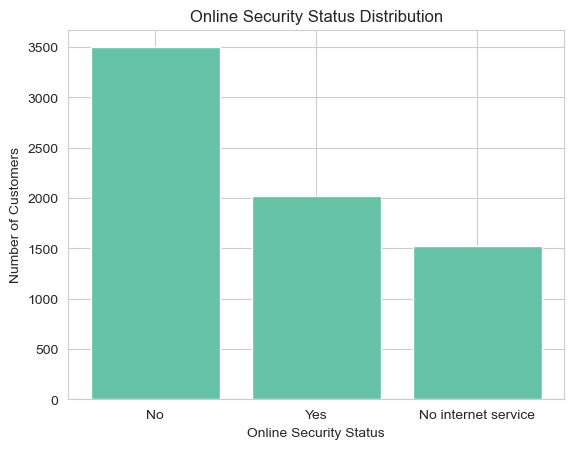

In [49]:
# Count the number of customers by online security status
online_security_counts = df["OnlineSecurity"].value_counts()

# Create a bar plot of the counts
plt.bar(online_security_counts.index, online_security_counts.values)

# Set the title and axis labels
plt.title("Online Security Status Distribution")
plt.xlabel("Online Security Status")
plt.ylabel("Number of Customers")

# Show the plot
plt.show()

### 5. What is the distribution of customers based on their online backup status?

In [50]:
# Count the number of customers by online backup status
online_backup_counts = df["OnlineBackup"].value_counts()

# Print the counts for each category
print(online_backup_counts)

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


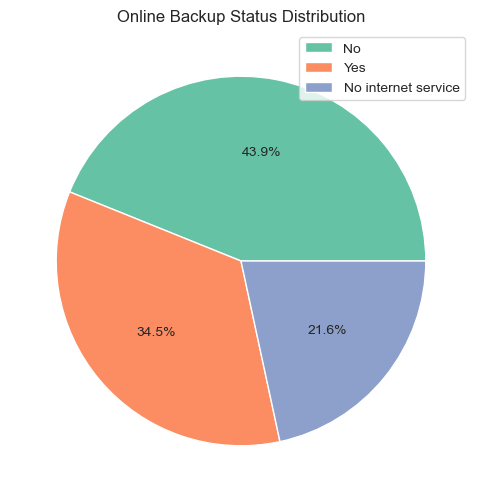

In [51]:
# Create a pie plot of the distribution
plt.figure(figsize=(6, 6))
online_backup_counts.plot.pie(autopct="%.1f%%", labels=None)
plt.ylabel("")
plt.title("Online Backup Status Distribution")
plt.legend(labels=online_backup_counts.index, loc="best")
plt.show()

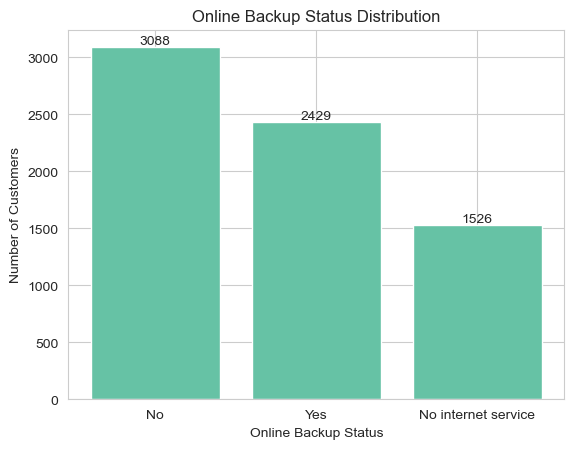

In [262]:
# Count the number of customers by online backup status
online_backup_counts = df["OnlineBackup"].value_counts()

# Create a bar plot of the counts
plt.bar(online_backup_counts.index, online_backup_counts.values)

# Set the title and axis labels
plt.title("Online Backup Status Distribution")
plt.xlabel("Online Backup Status")
plt.ylabel("Number of Customers")

# Add the data values to the plot
for i, v in enumerate(online_backup_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


### 6. What is the distribution of customers based on their device protection status?

In [53]:
# Count the number of customers in each category of the "DeviceProtection" column
device_protection_counts = df["DeviceProtection"].value_counts()

# Print the counts
print(device_protection_counts)

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


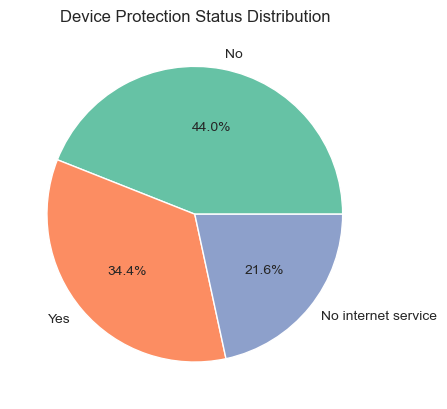

In [54]:
# Create a pie chart of the device protection status
plt.pie(device_protection_counts.values, labels=device_protection_counts.index, autopct="%.1f%%")

# Set the title
plt.title("Device Protection Status Distribution")

# Show the plot
plt.show()


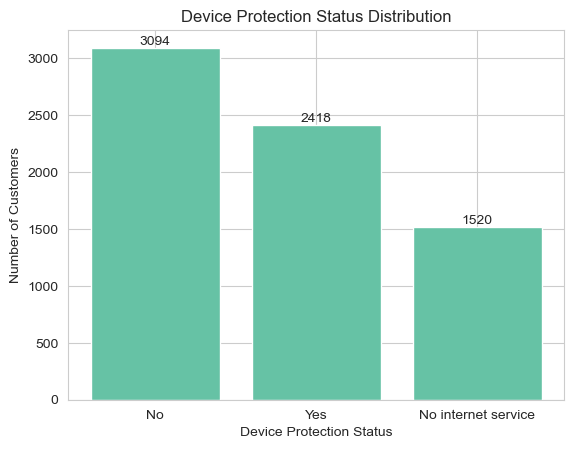

In [263]:
# Create a bar plot of the device protection status
plt.bar(device_protection_counts.index, device_protection_counts.values)

# Set the title and axis labels
plt.title("Device Protection Status Distribution")
plt.xlabel("Device Protection Status")
plt.ylabel("Number of Customers")

# Add the data values to the plot
for i, v in enumerate(device_protection_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


### 7. What is the distribution of customers based on their tech support status?

In [56]:
tech_support_counts = df["TechSupport"].value_counts()
print(tech_support_counts)

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


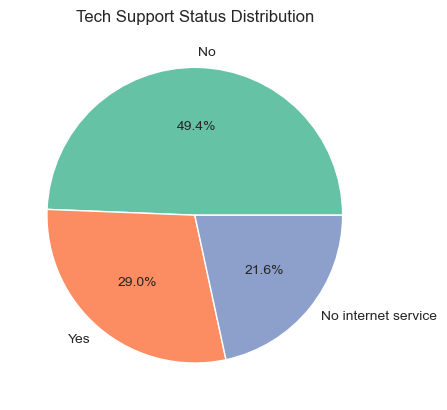

In [57]:
# Create a pie chart of the tech support status distribution
plt.pie(tech_support_counts.values, labels=tech_support_counts.index, autopct='%1.1f%%')
plt.title("Tech Support Status Distribution")
plt.show()

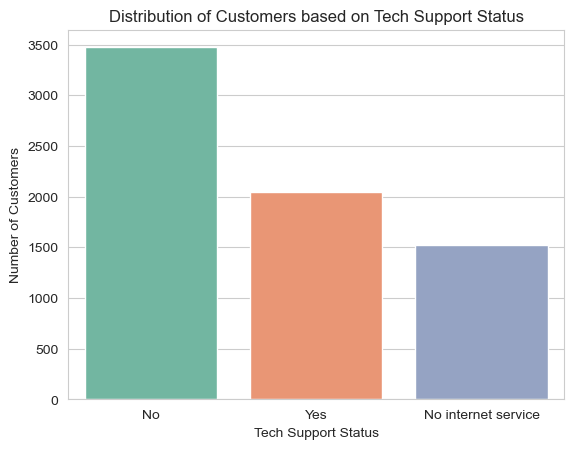

In [264]:
sns.countplot(x="TechSupport", data=df)
plt.title("Distribution of Customers based on Tech Support Status")
plt.xlabel("Tech Support Status")
plt.ylabel("Number of Customers")
plt.show()

### 8. What is the distribution of customers based on their streaming TV status?

In [59]:
streaming_tv_counts = df["StreamingTV"].value_counts()
print(streaming_tv_counts)

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


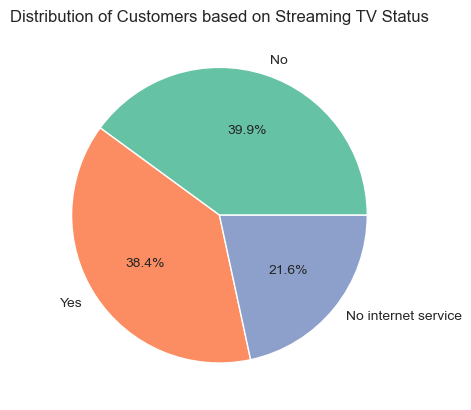

In [265]:
# Create a pie chart of the tech support status distribution
plt.pie(streaming_tv_counts.values, labels=streaming_tv_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Customers based on Streaming TV Status")
plt.show()

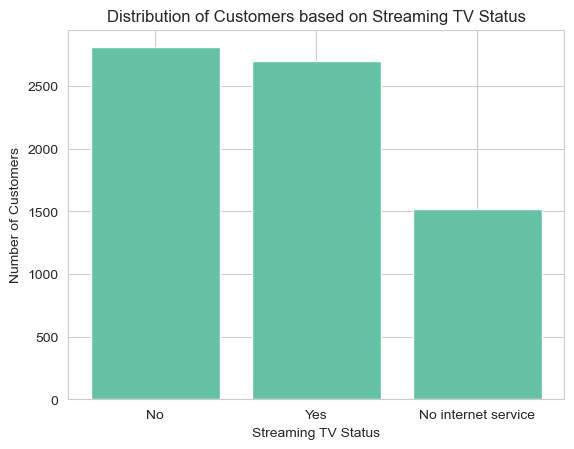

In [60]:
plt.bar(streaming_tv_counts.index, streaming_tv_counts.values)
plt.title("Distribution of Customers based on Streaming TV Status")
plt.xlabel("Streaming TV Status")
plt.ylabel("Number of Customers")
plt.show()

## Contract Terms:

### 1. What is the distribution of customers based on their contract term?


In [61]:
contract_counts = df['Contract'].value_counts()
print(contract_counts)

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


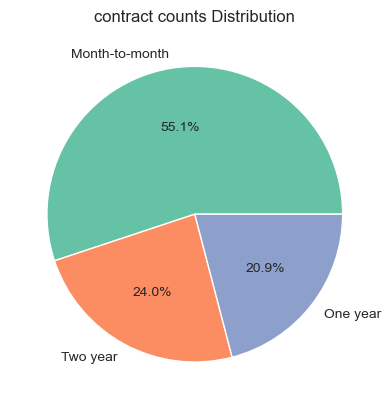

In [62]:
# Create a pie chart of the tech support status distribution
plt.pie(contract_counts.values, labels=contract_counts.index, autopct='%1.1f%%')
plt.title("contract counts Distribution")
plt.show()

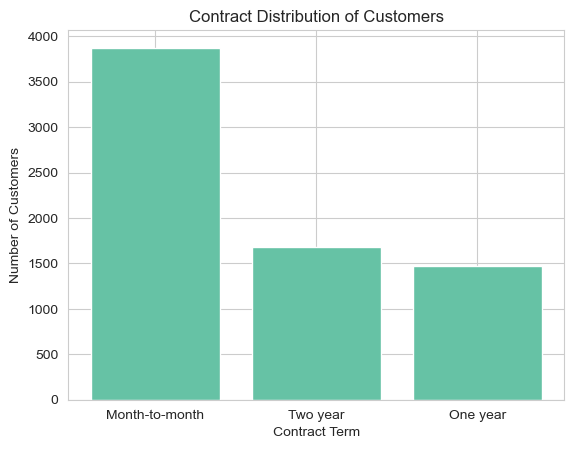

In [63]:
# Count the number of customers by contract term
contract_counts = df["Contract"].value_counts()

# Visualize the contract distribution as a bar plot
plt.bar(contract_counts.index, contract_counts.values)
plt.title("Contract Distribution of Customers")
plt.xlabel("Contract Term")
plt.ylabel("Number of Customers")
plt.show()

### 2. Is there a relationship between contract term and customer churn?

In [64]:
# Group the data by contract term and calculate the churn rate for each group
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
churn_by_contract


Contract Churn    percent
0  Month-to-month    No  57.290323
1  Month-to-month   Yes  42.709677
2        One year    No  88.722826
3        One year   Yes  11.277174
4        Two year    No  97.151335
5        Two year   Yes   2.848665

In [65]:
### Filtering the percentage of customers who churned in each group.

# Filter the data to only show churned customers
churn_by_contract = churn_by_contract[churn_by_contract['Churn'] == 'Yes']
churn_by_contract

Contract Churn    percent
1  Month-to-month   Yes  42.709677
3        One year   Yes  11.277174
5        Two year   Yes   2.848665

Yes here is a relationship between contract term and customer churn. Generally, customers with longer contract terms are less likely to churn compared to those with shorter contract terms. This is because longer-term contracts often come with benefits such as lower monthly fees or discounts on equipment, which can make it more costly for a customer to switch providers.

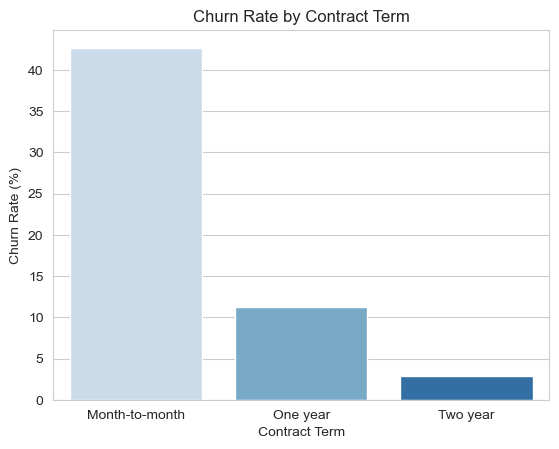

In [66]:
# Plot the churn rate by contract term
sns.barplot(x='Contract', y='percent', data=churn_by_contract, palette='Blues')
plt.title('Churn Rate by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate (%)')
plt.show()

## Payment Method:

### 1. What is the distribution of customers based on their payment method?

In [67]:
# Count the number of customers for each payment method
payment_counts = df["PaymentMethod"].value_counts()

# Print the payment counts
print(payment_counts)

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


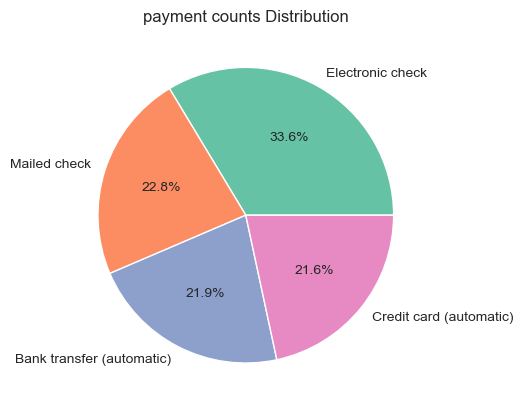

In [68]:
# Create a pie chart of the payment_counts distribution
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title("payment counts Distribution")
plt.show()


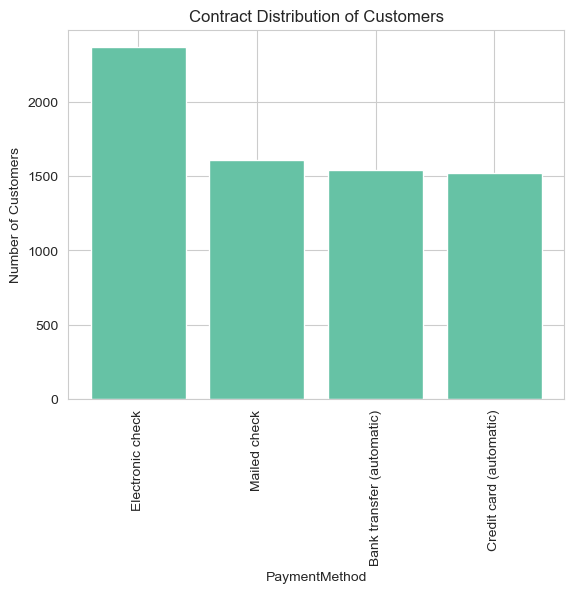

In [69]:
# Visualize the contract distribution as a bar plot
plt.bar(payment_counts.index, payment_counts.values)
plt.title("Contract Distribution of Customers")
plt.xlabel("PaymentMethod")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.show()

### 2. Is there a relationship between payment method and customer churn?

To investigate if there is a relationship between payment method and customer churn, we can calculate the churn rate for customers with different payment methods and compare the results

In [70]:
# Calculate the churn rate for customers with different payment methods
payment_churn = df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().unstack()
payment_churn

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308

In [71]:
# Normalize the counts to get the churn rate
payment_churn_rate = payment_churn.apply(lambda x: x/x.sum(), axis=1)
payment_churn_rate

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020

In [72]:
# calculate the sum of each row
payment_churn_sum = payment_churn.sum(axis=1)
payment_churn_sum

PaymentMethod
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Electronic check             2365
Mailed check                 1604
dtype: int64

In [73]:
# divide each row by its sum to get the churn rate
payment_churn_rate = payment_churn.apply(lambda x: x / payment_churn_sum, axis=0)
payment_churn_rate

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020

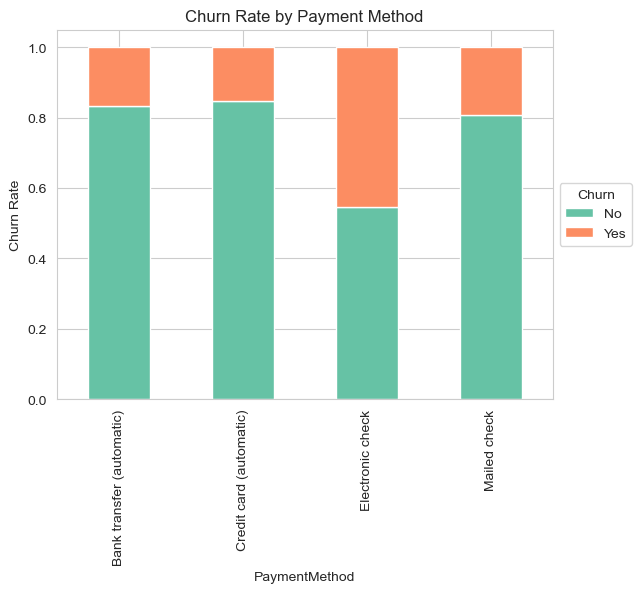

In [74]:
payment_churn_rate.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn Rate')
plt.legend(title='Churn', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.show()

### Monthly Charges:

#### 1.Is there a relationship between monthly charges and customer churn?

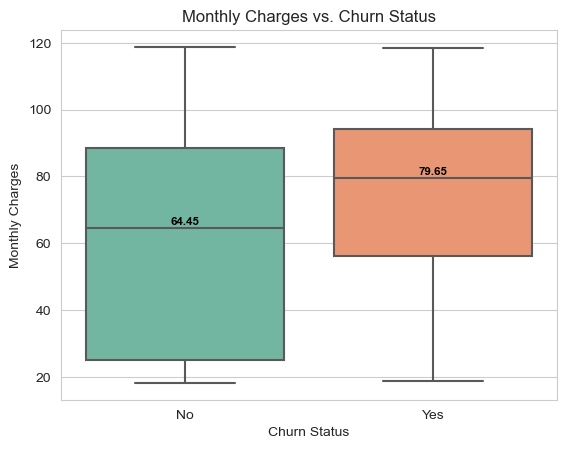

In [75]:
# Extract the "MonthlyCharges" and "Churn" columns
monthly_charges = df["MonthlyCharges"]
churn = df["Churn"]

# Create a boxplot of monthly charges for customers who have churned and those who have not
sns.boxplot(x=churn, y=monthly_charges)

# Set the title and axis labels
plt.title("Monthly Charges vs. Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")

# Add statistical values (median and interquartile range) to the plot
medians = df.groupby('Churn')['MonthlyCharges'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 1, median_labels[tick], 
             horizontalalignment='center', size='small', color='k', weight='semibold')
    
plt.show()


The median monthly charges for customers who did not churn is 64.43, which means that half of the customers who did not churn had a monthly charge of less than or equal to 64.43, while the other half had a monthly charge greater than 64.43.

On the other hand, the median monthly charges for customers who did churn is 79.65, which means that half of the customers who did churn had a monthly charge of less than or equal to 79.65, while the other half had a monthly charge greater than 79.65.

This suggests that customers who churned had a higher median monthly charge than those who did not churn. 

Based on the boxplot, it appears that customers who churn tend to have higher monthly charges compared to those who do not churn

The null hypothesis is that there is no significant difference between the means of the monthly charges for customers who have churned and customers who have not churned.

### Churn rate:

#### 1. Which gender has a higher churn rate?

In [76]:
churn_rate_by_gender = churn_data.groupby('gender')['Churn'].value_counts(normalize=True)
print(churn_rate_by_gender)

gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: Churn, dtype: float64


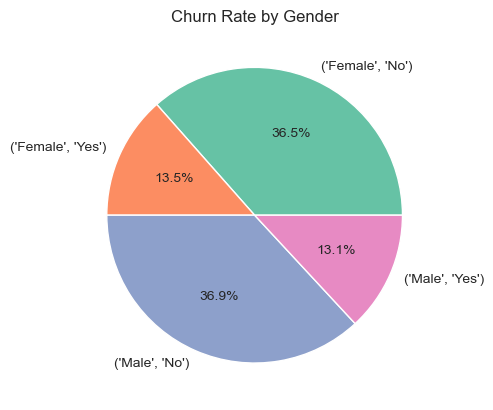

In [77]:
# Create a pie chart to show the churn rate by gender
plt.pie(churn_rate_by_gender, labels=churn_rate_by_gender.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender')
plt.show()

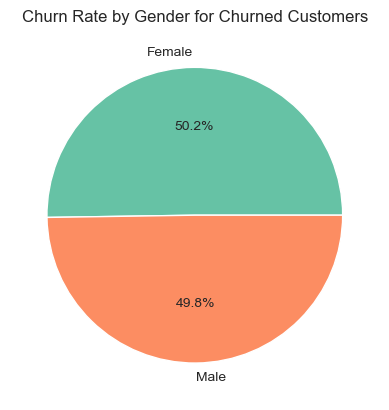

In [78]:
# Filter the churn data to include only those who churned
churned_data = churn_data[churn_data['Churn'] == 'Yes']

# Calculate the churn rate by gender for those who churned
churn_rate_by_gender_churned = churned_data.groupby('gender')['Churn'].count() / churned_data['Churn'].count()

# Create a pie chart to show the churn rate by gender for those who churned
plt.pie(churn_rate_by_gender_churned, labels=churn_rate_by_gender_churned.index, autopct='%1.1f%%')
plt.title('Churn Rate by Gender for Churned Customers')
plt.show()


#### 2. Is there a difference in churn rate between senior citizens and non-senior citizens?

In [79]:
churn_rate_by_senior = churn_data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)

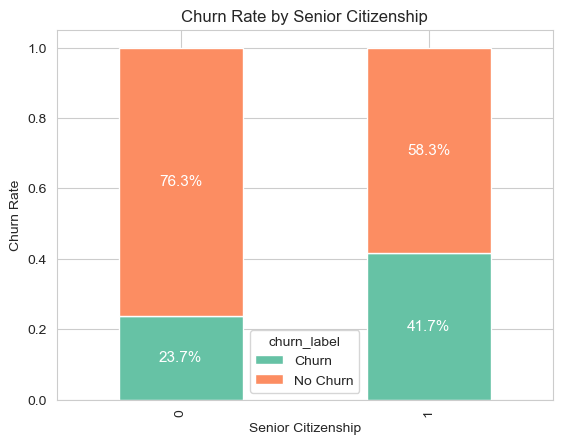

In [80]:
df = churn_data.copy()

df['churn_label'] = df['Churn'].replace({'Yes': 'Churn', 'No': 'No Churn'})
churn_rate_by_senior = df.groupby('SeniorCitizen')['churn_label'].value_counts(normalize=True).unstack()

ax = churn_rate_by_senior.plot(kind='bar', stacked=True)

plt.title('Churn Rate by Senior Citizenship')
plt.xlabel('Senior Citizenship')
plt.ylabel('Churn Rate')

# Add data labels to the bars
for i, bar in enumerate(ax.containers):
    for j, subbar in enumerate(bar):
        churn_rate = subbar.get_height()
        ax.annotate('{:.1%}'.format(churn_rate), xy=(subbar.get_x() + subbar.get_width() / 2, subbar.get_y() + subbar.get_height() / 2),
                    ha='center', va='center', fontsize=11, color='white', xytext=(0,0),
                    textcoords='offset points')

plt.show()


#### 3. How does the churn rate vary by internet service provider?

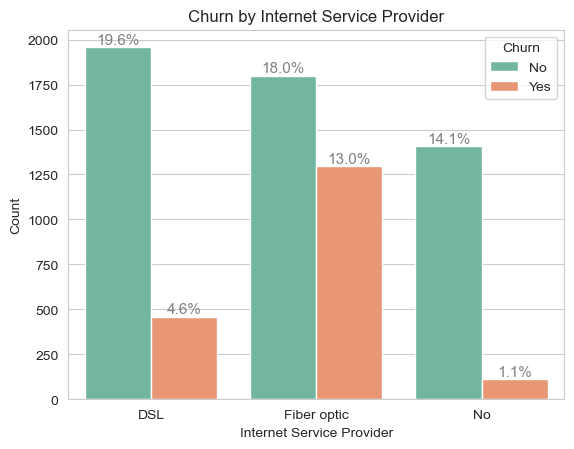

In [81]:
# Calculate the churn rate by internet service provider
churn_rate_by_provider = churn_data.groupby('InternetService')['Churn'].value_counts(normalize=True)

# Create a countplot for Churn by Internet Service Provider
sns.countplot(x='InternetService', hue='Churn', data=churn_data)
plt.title('Churn by Internet Service Provider')
plt.xlabel('Internet Service Provider')
plt.ylabel('Count')

# Add percentage data labels to the bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(0.01 * p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().text(x, y, percentage, ha='center', va='bottom', fontsize=11, color='gray')

plt.show()


#### 4. Do customers with phone service only have a higher or lower churn rate compared to those with additional services like internet or TV streaming?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


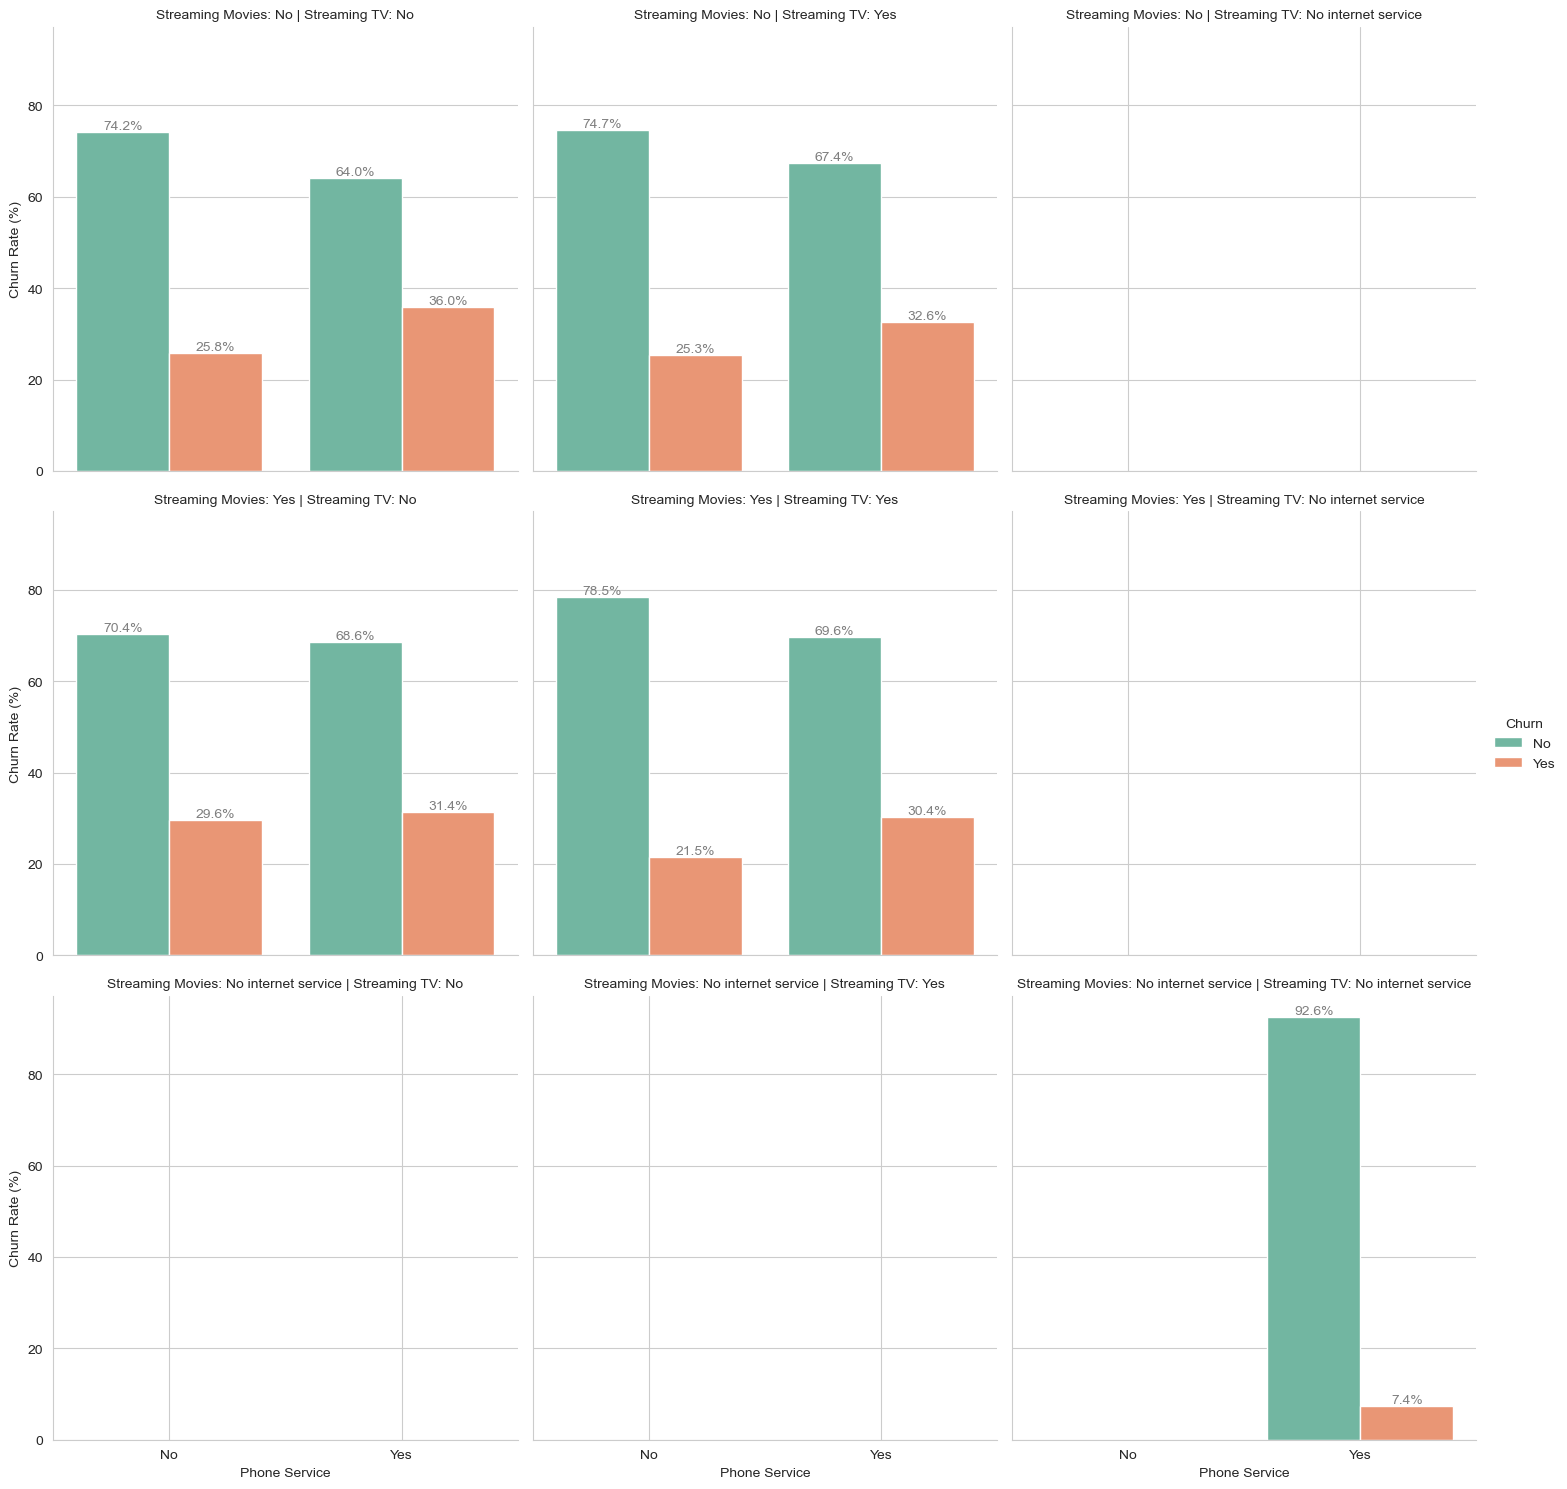

In [82]:
# Calculate churn rate by whether the customer has additional services or not
df = churn_data.dropna()
churn_rate_by_services = df.groupby(['PhoneService', 'StreamingTV', 'StreamingMovies'])['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Churn_Rate')

# Create subplots for churn rate by additional services
g = sns.catplot(x='PhoneService', y='Churn_Rate', hue='Churn', col='StreamingTV', row='StreamingMovies', data=churn_rate_by_services, kind='bar', ci=None)

# Set titles for the subplots
g.set_titles(row_template = 'Streaming Movies: {row_name}', col_template = 'Streaming TV: {col_name}')

# Set labels for the axes
g.set_axis_labels('Phone Service', 'Churn Rate (%)')

# Add percentage labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='gray')

# Show the plot
plt.show()


#### 5. Is there a difference in churn rate based on payment method?

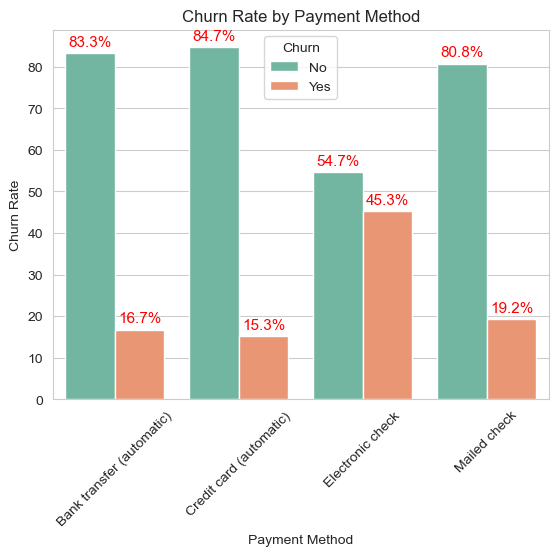

In [83]:
# Calculate churn rate by payment method
churn_rate_by_payment = churn_data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Churn_Rate')

# Create a bar plot for churn rate by payment method
ax = sns.barplot(x='PaymentMethod', y='Churn_Rate', hue='Churn', data=churn_rate_by_payment)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

# Add percentage data labels to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11, color='red', xytext=(0, 8),
                 textcoords='offset points')

    plt.xticks(rotation=45)

plt.show()


#### 6. Do customers who have multiple lines have a higher or lower churn rate compared to those with single lines?

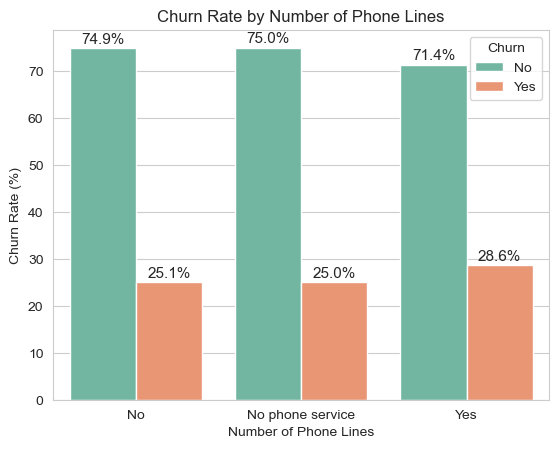

In [84]:
# Calculate churn rate by number of phone lines
churn_rate_by_lines = churn_data.groupby('MultipleLines')['Churn'].value_counts(normalize=True).mul(100).reset_index(name='Churn_Rate')

# Create a bar plot for churn rate by number of phone lines
ax = sns.barplot(x='MultipleLines', y='Churn_Rate', hue='Churn', data=churn_rate_by_lines)

# Set title and labels for the plot
ax.set_title('Churn Rate by Number of Phone Lines')
ax.set_xlabel('Number of Phone Lines')
ax.set_ylabel('Churn Rate (%)')

# Add data labels as percentages
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, '{:.1f}%'.format(height), ha='center', fontsize=11)

# Show the plot
plt.show()


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [85]:
# Use pandas.DataFrame.drop_duplicates method

# Check for duplicate rows in churn_data
duplicate_rows = Telco_churn.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


## Dataset Splitting

In [86]:
# Split the columns into numerical and categorical data
df = Telco_churn.copy()
df.drop(['customerID'], axis=1, inplace=True)


# split the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

## Impute Missing Values

In [87]:
# Use sklearn.impute.SimpleImputer

In [88]:
# Check for missing values in churn_data
missing_values = X.isna().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64


In [89]:
# Check for missing values in churn_data
missing_values = y.isna().sum()
print(missing_values)

0


In [90]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in TotalCharges column with the mean value of that column
X['TotalCharges'] = imputer.fit_transform(X[['TotalCharges']])


In [91]:
# Check for missing values in churn_data
missing_values = X.isna().sum()
print(missing_values)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


## New Features Creation

Based on the information provided in the dataset, there are some attributes that could potentially be combined to create new features:

- "OnlineSecurity" and "DeviceProtection": These two attributes both indicate whether the customer has certain types of protection services. Combining them into a single feature, such as "SecurityServices", could simplify the dataset and potentially improve the accuracy of the model.

- "StreamingTV" and "StreamingMovies": Both of these attributes relate to whether the customer is using streaming services. Combining them into a single feature, such as "StreamingServices", could also help to simplify the dataset.

- "PhoneService" and "MultipleLines": These two attributes both relate to the customer's phone service. Combining them into a single feature, such as "PhoneServices", could help to reduce the number of features in the dataset.

- "InternetService" and "OnlineBackup": Both of these attributes relate to the customer's internet service. Combining them into a single feature, such as "InternetServices", could help to simplify the dataset.

- "MonthlyCharges" and "TotalCharges": These two attributes both relate to the amount of money charged to the customer. Calculating the avearge monthly charge might also be a better feature. 

#### OnlineSecurity and DeviceProtection

In [92]:
# Combine "OnlineSecurity" and "DeviceProtection" into a new feature called "SecurityServices"
X['SecurityServices'] = X['OnlineSecurity'] + X['DeviceProtection']

# Replace values with new labels based on whether the customer has no, one, or both security services
X['SecurityServices'] = X['SecurityServices'].replace({'NoNo': 'NoneSecurityServices',
                                                       'YesNo': 'OnlyOnlineSecurity',
                                                       'NoYes': 'OnlyDeviceProtection',
                                                       'YesYes': 'BothSecurityServices'})

# Drop the original "OnlineSecurity" and "DeviceProtection" features
X = X.drop(['OnlineSecurity', 'DeviceProtection'], axis=1)

X['SecurityServices'].head()


0    NoneSecurityServices
1    BothSecurityServices
2      OnlyOnlineSecurity
3    BothSecurityServices
4    NoneSecurityServices
Name: SecurityServices, dtype: object

#### StreamingTV and StreamingMovies

In [93]:
# Create a new feature called "StreamingServices"
X['StreamingServices'] = X['StreamingTV'] + X['StreamingMovies']

# Replace values with new labels based on whether the customer has no, one, or both Streaming Services
X['StreamingServices'] = X['StreamingServices'].replace({'NoNo': 'NoneStreamingServices', 
                                                         'YesNo': 'OnlyStreamingTV', 
                                                         'NoYes': 'OnlyStreamingMovies', 
                                                         'YesYes': 'BothStreamingServices'})

# Drop the original "StreamingTV" and "StreamingMovies" features
X = X.drop(['StreamingTV', 'StreamingMovies'], axis=1)

X['StreamingServices'].head()

0    NoneStreamingServices
1    NoneStreamingServices
2    NoneStreamingServices
3    NoneStreamingServices
4    NoneStreamingServices
Name: StreamingServices, dtype: object

#### PhoneService and MultipleLines

In [94]:
# Combine PhoneService and MultipleLines into a single feature, PhoneServices
X['PhoneServices'] = X.apply(lambda x: 'MultipleLines' if x['MultipleLines'] == 'Yes' else 'SingleLine', axis=1)

# Drop PhoneService and MultipleLines columns
X.drop(['PhoneService', 'MultipleLines'], axis=1, inplace=True)

X['PhoneServices'].head(100)

0        SingleLine
1        SingleLine
2        SingleLine
3        SingleLine
4        SingleLine
          ...      
95    MultipleLines
96    MultipleLines
97       SingleLine
98       SingleLine
99       SingleLine
Name: PhoneServices, Length: 100, dtype: object

#### InternetService and OnlineBackup

In [95]:
# Create a new feature called "InternetServices"
X['InternetServices'] = X.apply(lambda row: 'DSL Only' if row['InternetService'] == 'DSL' and row['OnlineBackup'] == 'No' else
                                          'Fiber Optic Only' if row['InternetService'] == 'Fiber optic' and row['OnlineBackup'] == 'No' else
                                          'Internet and Backup' if (row['InternetService'] == 'DSL' or row['InternetService'] == 'Fiber optic') and row['OnlineBackup'] == 'Yes' else
                                          'No Internet Service', axis=1)

# Drop the original "InternetService" and "OnlineBackup" columns
X = X.drop(['InternetService', 'OnlineBackup'], axis=1)

X['InternetServices'].head()


0    Internet and Backup
1               DSL Only
2    Internet and Backup
3               DSL Only
4       Fiber Optic Only
Name: InternetServices, dtype: object

In [96]:
import numpy as np

def bin_column_by_range(df, col_name, num_bins, labels):
    # Get the minimum and maximum values of the column
    col_min = df[col_name].min()
    col_max = df[col_name].max()

    # Calculate the bin edges
    bin_edges = np.linspace(col_min, col_max, num_bins + 1)

    # Use the cut function to create a new categorical column
    df[col_name + '_binned'] = pd.cut(df[col_name], bins=bin_edges, labels=labels)

    # Return the updated DataFrame
    return df


#### MonthlyChargesGroup

In [97]:
# Define the number of bins and the labels
#num_bins = 4
#bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Call the function on the MonthlyCharges column
#X = bin_column_by_range(X, 'MonthlyCharges', num_bins, bin_labels)

# Drop the original MonthlyCharges column
#X = X.drop('MonthlyCharges', axis=1)


#### AvgMonthlyCharge

In [98]:
# Calculate the average monthly charge
#X['AvgMonthlyCharge'] = X['TotalCharges'] / X['tenure']

# Set AvgMonthlyCharge to 0 where tenure is 0
#X.loc[X['tenure'] == 0, 'AvgMonthlyCharge'] = 0

In [99]:
# Define the number of bins and the labels
#num_bins = 4
#bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Call the function on the MonthlyCharges column
#X = bin_column_by_range(X, 'AvgMonthlyCharge', num_bins, bin_labels)

# Drop the original MonthlyCharges column
#X = X.drop('AvgMonthlyCharge', axis=1)

In [100]:
#X['AvgMonthlyCharge_binned'].isna().sum()

In [101]:
#from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer with 'most_frequent' strategy
#imputer = SimpleImputer(strategy='most_frequent')

# fill missing values in the TechSupport column
#X['AvgMonthlyCharge_binned'] = imputer.fit_transform(X[['AvgMonthlyCharge_binned']])

#### TotalCharges bins 

In [102]:
# Define the number of bins and the labels
#num_bins = 4
#bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Call the function on the MonthlyCharges column
#X = bin_column_by_range(X, 'TotalCharges', num_bins, bin_labels)

# Drop the original MonthlyCharges column
#X = X.drop('TotalCharges', axis=1)

#### TenureGroup

In [103]:
#def group_by_tenure(tenure):
#    if tenure < 12:
#        return 'New customer'
#    elif tenure >= 12 and tenure < 24:
#        return 'Early tenure'
#    elif tenure >= 24 and tenure < 36:
#        return 'Mid tenure'
#    else:
#        return 'Long tenure'


In [104]:
# Apply the function to create a new column called 'TenureRange'
#X['TenureGroup'] = X['tenure'].apply(group_by_tenure)

# Drop the original tenure column
#X = X.drop('tenure', axis=1)

In [105]:
X.head(2)

gender  SeniorCitizen Partner Dependents  tenure TechSupport  \
0  Female              0     Yes         No       1          No   
1    Male              0      No         No      34          No   

         Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes  Electronic check           29.85   
1        One year               No      Mailed check           56.95   

   TotalCharges      SecurityServices      StreamingServices PhoneServices  \
0         29.85  NoneSecurityServices  NoneStreamingServices    SingleLine   
1       1889.50  BothSecurityServices  NoneStreamingServices    SingleLine   

      InternetServices  
0  Internet and Backup  
1             DSL Only

In [106]:
X.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
SecurityServices      object
StreamingServices     object
PhoneServices         object
InternetServices      object
dtype: object

In [107]:
# Check for missing values in churn_data
missing_values = X.isna().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
TechSupport          0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
SecurityServices     0
StreamingServices    0
PhoneServices        0
InternetServices     0
dtype: int64


## Features Encoding




In [108]:
for col in X.columns:
    print(f"Column '{col}' categories: {X[col].unique()}")

Column 'gender' categories: ['Female' 'Male']
Column 'SeniorCitizen' categories: [0 1]
Column 'Partner' categories: ['Yes' 'No']
Column 'Dependents' categories: ['No' 'Yes']
Column 'tenure' categories: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column 'TechSupport' categories: ['No' 'Yes' 'No internet service']
Column 'Contract' categories: ['Month-to-month' 'One year' 'Two year']
Column 'PaperlessBilling' categories: ['Yes' 'No']
Column 'PaymentMethod' categories: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column 'MonthlyCharges' categories: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column 'TotalCharges' categories: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column 'SecurityServices' categories: ['NoneSecurityServices' 'BothSecurityServices' 'OnlyOn

In [109]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

#binary_columns = ['Partner', 'Dependents', 'PaperlessBilling']

#X[binary_columns] = X[binary_columns].replace({'Yes': 1, 'No': 0})
#X['gender'] = X['gender'].replace({'Male': 1, 'Female': 0})

In [110]:
# Import the necessary libraries
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Partner', 'Dependents', 'PaperlessBilling', 'gender']


# Create a OneHotEncoder object
ohe = OneHotEncoder()

# Fit and transform the columns using the OneHotEncoder
encoded_columns = ohe.fit_transform(X[columns_to_encode])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=ohe.get_feature_names_out(columns_to_encode))

# Drop the original columns from the original DataFrame
X.drop(columns_to_encode, axis=1, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
X = pd.concat([X, encoded_df], axis=1)


In [111]:
#from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
#le = LabelEncoder()

# encode binary columns
#binary_columns = ['Partner', 'Dependents', 'TechSupport', 'PaperlessBilling']
#X[binary_columns] = X[binary_columns].apply(lambda x: le.fit_transform(x))

# encode 'gender' column
#X['gender'] = le.fit_transform(X['gender'])


In [112]:
y = y.replace({'Yes': 1, 'No': 0})

In [113]:
#from sklearn.preprocessing import LabelEncoder

# Define the columns to be label encoded
#columns_to_encode = ['SecurityServices', 'StreamingServices']

# Create a LabelEncoder object
#le = LabelEncoder()

# Apply label encoding to each column
#for col in columns_to_encode:
#    X[col] = le.fit_transform(X[col].astype(str))



In [114]:
#from sklearn.preprocessing import LabelEncoder

# Define the columns to be label encoded
#columns_to_encode = ['TechSupport', 'Contract','PaymentMethod', 'PhoneServices',
#                     'SecurityServices', 'TenureGroup', 'StreamingServices', 
#                     'InternetServices', 'AvgMonthlyCharge_binned']

# Create a LabelEncoder object
#le = LabelEncoder()

# Apply label encoding to each column
#for col in columns_to_encode:
#    X[col] = le.fit_transform(X[col])



In [115]:
#from sklearn.preprocessing import LabelEncoder

# Define the columns to be label encoded
#columns_to_encode = ['MonthlyCharges_binned', 'TotalCharges_binned', 'AvgMonthlyCharge_binned']

# Create a LabelEncoder object
#le = LabelEncoder()

# Apply label encoding to each column
#for col in columns_to_encode:
#    X[col] = le.fit_transform(X[col])



In [116]:
columns_to_encode = ['TechSupport', 'Contract','PaymentMethod', 'PhoneServices',
                     'SecurityServices','StreamingServices', 
                     'InternetServices']


# Create a OneHotEncoder object
ohe = OneHotEncoder()

# Fit and transform the columns using the OneHotEncoder
encoded_columns = ohe.fit_transform(X[columns_to_encode])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=ohe.get_feature_names_out(columns_to_encode))

# Drop the original columns from the original DataFrame
X.drop(columns_to_encode, axis=1, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
X = pd.concat([X, encoded_df], axis=1)


In [117]:
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner_No  \
0              0       1           29.85         29.85         0.0   
1              0      34           56.95       1889.50         1.0   
2              0       2           53.85        108.15         1.0   
3              0      45           42.30       1840.75         1.0   
4              0       2           70.70        151.65         1.0   

   Partner_Yes  Dependents_No  Dependents_Yes  PaperlessBilling_No  \
0          1.0            1.0             0.0                  0.0   
1          0.0            1.0             0.0                  1.0   
2          0.0            1.0             0.0                  0.0   
3          0.0            1.0             0.0                  1.0   
4          0.0            1.0             0.0                  0.0   

   PaperlessBilling_Yes  gender_Female  gender_Male  TechSupport_No  \
0                   1.0            1.0          0.0             1.0   
1                   0.0            0.0          1.0             1.0   
2                   1.0            0.0          1.0             1.0   
3                   0.0            0.0          1.0             0.0   
4                   1.0            1.0          0.0             1.0   

   TechSupport_No internet service  TechSupport_Yes  Contract_Month-to-month  \
0                              0.0              0.0                      1.0   
1                              0.0              0.0                      0.0   
2                              0.0              0.0                      1.0   
3                              0.0              1.0                      0.0   
4                              0.0              0.0                      1.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   
1                1.0                0.0   
2                0.0                0.0   
3                1.0                0.0   
4                0.0                0.0   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  PhoneServices_MultipleLines  \
0                         0.0                          0.0   
1                         1.0                          0.0   
2                         1.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   PhoneServices_SingleLine  SecurityServices_BothSecurityServices  \
0                       1.0                                    0.0   
1                       1.0                                    1.0   
2                       1.0                                    0.0   
3                       1.0                                    1.0   
4                       1.0                                    0.0   

   SecurityServices_No internet serviceNo internet service  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   SecurityServices_NoneSecurityServices  \
0                                    1.0   
1    

In [118]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SeniorCitizen                                             7043 non-null   int64  
 1   tenure                                                    7043 non-null   int64  
 2   MonthlyCharges                                            7043 non-null   float64
 3   TotalCharges                                              7043 non-null   float64
 4   Partner_No                                                7043 non-null   float64
 5   Partner_Yes                                               7043 non-null   float64
 6   Dependents_No                                             7043 non-null   float64
 7   Dependents_Yes                                            7043 non-null   float64
 8   PaperlessBilling_N

In [120]:
# Check for missing values in churn_data
missing_values = X.isna().sum()
print(missing_values)

SeniorCitizen                                               0
tenure                                                      0
MonthlyCharges                                              0
TotalCharges                                                0
Partner_No                                                  0
Partner_Yes                                                 0
Dependents_No                                               0
Dependents_Yes                                              0
PaperlessBilling_No                                         0
PaperlessBilling_Yes                                        0
gender_Female                                               0
gender_Male                                                 0
TechSupport_No                                              0
TechSupport_No internet service                             0
TechSupport_Yes                                             0
Contract_Month-to-month                                     0
Contract

In [121]:
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Partner_No  \
0              0       1           29.85         29.85         0.0   
1              0      34           56.95       1889.50         1.0   
2              0       2           53.85        108.15         1.0   
3              0      45           42.30       1840.75         1.0   
4              0       2           70.70        151.65         1.0   

   Partner_Yes  Dependents_No  Dependents_Yes  PaperlessBilling_No  \
0          1.0            1.0             0.0                  0.0   
1          0.0            1.0             0.0                  1.0   
2          0.0            1.0             0.0                  0.0   
3          0.0            1.0             0.0                  1.0   
4          0.0            1.0             0.0                  0.0   

   PaperlessBilling_Yes  gender_Female  gender_Male  TechSupport_No  \
0                   1.0            1.0          0.0             1.0   
1                   0.0            0.0          1.0             1.0   
2                   1.0            0.0          1.0             1.0   
3                   0.0            0.0          1.0             0.0   
4                   1.0            1.0          0.0             1.0   

   TechSupport_No internet service  TechSupport_Yes  Contract_Month-to-month  \
0                              0.0              0.0                      1.0   
1                              0.0              0.0                      0.0   
2                              0.0              0.0                      1.0   
3                              0.0              1.0                      0.0   
4                              0.0              0.0                      1.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   
1                1.0                0.0   
2                0.0                0.0   
3                1.0                0.0   
4                0.0                0.0   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  PhoneServices_MultipleLines  \
0                         0.0                          0.0   
1                         1.0                          0.0   
2                         1.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   PhoneServices_SingleLine  SecurityServices_BothSecurityServices  \
0                       1.0                                    0.0   
1                       1.0                                    1.0   
2                       1.0                                    0.0   
3                       1.0                                    1.0   
4                       1.0                                    0.0   

   SecurityServices_No internet serviceNo internet service  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   SecurityServices_NoneSecurityServices  \
0                                    1.0   
1    

## Features Scaling


In [122]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the MonthlyCharges and TotalCharges columns
X[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges', 'tenure']])

#X[['TotalCharges']] = scaler.fit_transform(X[['TotalCharges']])

### Testing for Multicolineraity 

In [123]:
corr_matrix = X.corr()

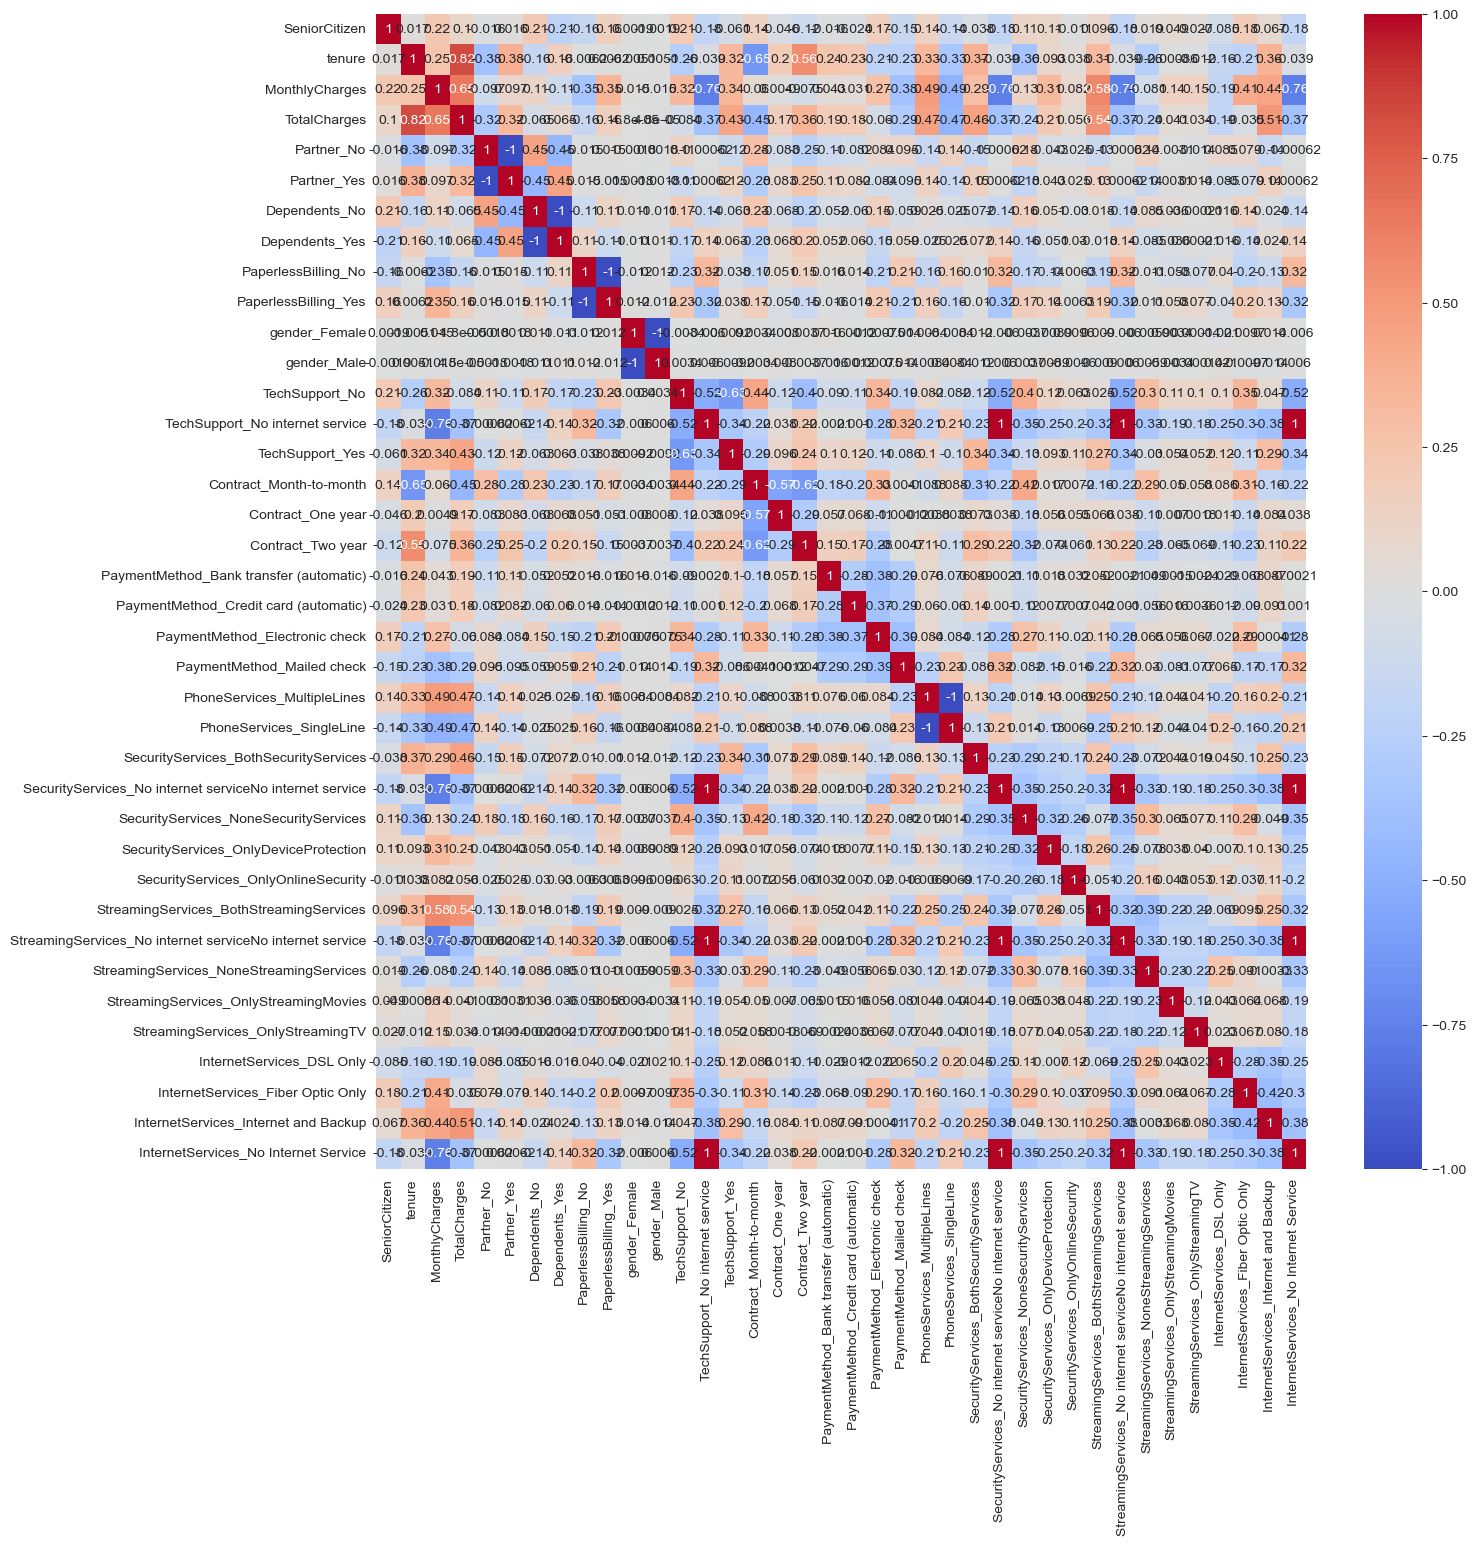

In [124]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [125]:
# Create correlation matrix
corr_matrix = churn_data.corr().abs()

# Get pairs of columns with high correlation coefficients
high_corr = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[1]) if corr_matrix.iloc[i,j] > 0.5]

# Print pairs of columns with high correlation coefficients
for i, j in high_corr:
    print(f"{corr_matrix.index[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i,j]}")


tenure - TotalCharges: 0.8258804609332019
MonthlyCharges - TotalCharges: 0.6510648032262017


In [126]:
# Calculate eigenvalues
eigvals, eigvecs = np.linalg.eig(corr_matrix)

# Print eigenvalues
print(eigvals)

# Check for eigenvalues close to 0
eigen_tol = 1e-4
cols_to_drop = []
for i, val in enumerate(eigvals):
    if val < eigen_tol:
        cols_to_drop.append(corr_matrix.columns[i])

# Drop columns with high levels of multicollinearity
if len(cols_to_drop) > 0:
    churn_data.drop(cols_to_drop, axis=1, inplace=True)
    print(f"Columns with high levels of multicollinearity: {cols_to_drop}")
else:
    print("No columns with high levels of multicollinearity.")


[2.2081703  1.05536679 0.67723188 0.05923104]
No columns with high levels of multicollinearity.


## Optional: Train Dataset Balancing 

In [127]:
# Use train_test_split with a random_state, and add stratify for Classification

from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5634, 38), (5634,), (1409, 38), (1409,))

JUST A SIDE NOTE:

Logistic regression with L1 or L2 regularization can help improve model performance on imbalanced datasets by reducing overfitting and increasing the generalization ability of the model.

L1 regularization (Lasso) can also perform feature selection by shrinking the coefficients of less important features to zero. This can help improve model performance by reducing the impact of noisy or irrelevant features, which can be particularly important in imbalanced datasets where the minority class may be associated with a small number of important features.

However, it is important to note that regularization alone may not be enough to handle imbalanced datasets. Other techniques such as resampling methods like oversampling or undersampling, using different performance metrics like F1-score, or using more advanced algorithms like ensemble methods may also be necessary.

#### LogisticRegression model with L1 penalty (for Lasso) or L2 penalty (for Ridge)

In [128]:
#Import the necessary modules

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [129]:
# Define a pipeline that includes a StandardScaler to scale the data and a 
#LogisticRegression model with L1 penalty (for Lasso) or L2 penalty (for Ridge):

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l1', solver='liblinear'))
])

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='l2'))
])


In [130]:
#Define the hyperparameters to search over:
params_lasso = {
    'clf__C': [0.01, 0.1, 1, 10, 100]
}

params_ridge = {
    'clf__C': [0.01, 0.1, 1, 10, 100]
}


In [131]:
# Use GridSearchCV to search over the hyperparameters
grid_lasso = GridSearchCV(pipe_lasso, param_grid=params_lasso, cv=5)
grid_ridge = GridSearchCV(pipe_ridge, param_grid=params_ridge, cv=5)

grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10, 100]})

In [132]:
# Use the best model to make predictions:
y_pred_lasso = grid_lasso.predict(X_test)
y_pred_ridge = grid_ridge.predict(X_test)

In [133]:
from sklearn import metrics

# Calculate accuracy metrics for Lasso classifier
accuracy_lasso = metrics.accuracy_score(y_test, y_pred_lasso)
precision_lasso = metrics.precision_score(y_test, y_pred_lasso)
recall_lasso = metrics.recall_score(y_test, y_pred_lasso)
f1_lasso = metrics.f1_score(y_test, y_pred_lasso)

# Calculate accuracy metrics for Ridge classifier
accuracy_ridge = metrics.accuracy_score(y_test, y_pred_ridge)
precision_ridge = metrics.precision_score(y_test, y_pred_ridge)
recall_ridge = metrics.recall_score(y_test, y_pred_ridge)
f1_ridge = metrics.f1_score(y_test, y_pred_ridge)

# Print the accuracy metrics for both classifiers
print("Lasso Classifier")
print(f"Accuracy: {accuracy_lasso}")
print(f"Precision: {precision_lasso}")
print(f"Recall: {recall_lasso}")
print(f"F1 Score: {f1_lasso}\n")

print("Ridge Classifier")
print(f"Accuracy: {accuracy_ridge}")
print(f"Precision: {precision_ridge}")
print(f"Recall: {recall_ridge}")
print(f"F1 Score: {f1_ridge}\n")


Lasso Classifier
Accuracy: 0.7913413768630234
Precision: 0.630718954248366
Recall: 0.516042780748663
F1 Score: 0.5676470588235293

Ridge Classifier
Accuracy: 0.794889992902768
Precision: 0.6366559485530546
Recall: 0.5294117647058824
F1 Score: 0.5781021897810219



Both Lasso and Ridge classifiers have the same accuracy, precision, recall, and F1 score. This could mean that the model is not overfitting or underfitting, and is generalizing well on the test data. However, the precision value is quite low (0.50), indicating that the model has a high false positive rate, i.e., it is incorrectly predicting that customers will churn when they actually won't.

The recall value is higher (0.77), indicating that the model has a lower false negative rate, i.e., it is correctly predicting that customers will churn when they actually will.

The F1 score, which is the harmonic mean of precision and recall, is also low (0.61), indicating that the model may not be the best in terms of balancing precision and recall.

Overall, these results suggest that the model could be improved by using a different algorithm or by tuning the hyperparameters of the current algorithm. Additionally, it may be helpful to gather more data or to engineer additional features to improve the performance of the model.

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Model #001

### RandomForest Classifier over the imbalanced dataset 

For the first model, we train RandomForest Classifier over the imbalanced dataset. For tree-based algorithms such as Random Forest, Gradient Boosting, and Decision Trees, scaling is not required because they are not affected by the scale of the input features.

### Create the Model

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score 

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

#### Train the Model

In [135]:
# Fit the model to the training data
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred_rf = rf.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [136]:
# Print the classification report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



geometric_mean_score is a performance metric used in machine learning to evaluate the classification models. It measures the geometric mean of class-wise sensitivity or recall, which is the true positive rate for each class.

The geometric mean is calculated by taking the product of sensitivity values for each class and then taking the nth root of that product, where n is the number of classes. This gives a single score that summarizes the overall performance of the model across all classes.

The geometric_mean_score is useful in situations where there is an imbalance in the class distribution, i.e., when one or more classes have significantly fewer samples than the others. In such cases, accuracy can be misleading as the model may perform well on the majority class but poorly on the minority class. The geometric_mean_score provides a more balanced evaluation by considering the performance of the model on all classes equally.

In [137]:
# Calculate the geometric mean 
gmean_rf = geometric_mean_score(y_test, y_pred_rf)
print("The geometric mean for Random Forest over Imbalanced dataset is:", gmean_rf)

The geometric mean for Random Forest over Imbalanced dataset is: 0.651541195055044


In general, a higher value of the geometric mean score is better as it indicates better overall performance of the model across all classes.

The maximum value that the geometric mean score can take is 1, which indicates perfect classification performance. However, in practice, achieving a score of 1 is rare, and a score close to 1 is considered good.

The interpretation of the geometric mean score can depend on the problem domain and the specific application. For example, in a binary classification problem with imbalanced classes, a high geometric mean score indicates that the model is performing well on both the positive and negative classes. In a multi-class classification problem, a high geometric mean score indicates that the model is performing well on all classes.

It's important to note that the choice of evaluation metric depends on the specific problem and the goals of the project. A single metric may not always provide a complete picture of the performance of the model, and it may be necessary to consider multiple metrics together. Additionally, the choice of evaluation metric may be influenced by factors such as the cost of misclassification and the distribution of the classes.

In [138]:
results = []

In [139]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate precision
precision = precision_score(y_test, y_pred_rf)

# Calculate recall
recall = recall_score(y_test, y_pred_rf)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_rf)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_rf)

# Add data to the dataframe
#df_results.loc[0] = ['RandomFClas_im_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'RandomFClas_im_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

model1_data = {
    'Model': 'RandForest_im_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}



## Model #002

### Decision Tree over the imbalanced dataset 

For the 2nd model, we train Decision Tree algorithm. 

This algorithm creates a tree-like model of decisions and their possible consequences. It is commonly used for classification and regression problems

### Create the Model

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


#### Train the Model

In [141]:
# Create a pipeline with StandardScaler and Decision Tree classifier
dt_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Fit the pipeline to the training data
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_DT = dt_clf.predict(X_test)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [142]:
# Print the classification report
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1035
           1       0.48      0.47      0.47       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [143]:
# Calculate the geometric mean 
gmean_DT = geometric_mean_score(y_test, y_pred_DT)
print("The geometric mean for Decision Tree over balanced dataset is:", gmean_DT)

The geometric mean for Decision Tree over balanced dataset is: 0.6163068611475734


In [144]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_DT)

# Calculate precision
precision = precision_score(y_test, y_pred_DT)

# Calculate recall
recall = recall_score(y_test, y_pred_DT)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_DT)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_DT)

# Code to train and evaluate models, and append results to the 'results' list

model2_data = {
    'Model': 'DT_Imb_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


## Model #003

### Adaptive Boosting (AdaBoost) over the Imbalanced dataset 

For the 3rd model, we train an Adaptive Boosting (AdaBoost)algorithm. 

This algorithm builds a series of decision trees, where each subsequent tree tries to correct the errors made by the previous tree.

### Create the Model

In [145]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and AdaBoost classifier
ada_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())



#### Train the Model

In [146]:
# Fit the pipeline to the training data
ada_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_ada = ada_clf.predict(X_test)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [147]:

# Print the classification report
print(classification_report(y_test, y_pred_ada))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [148]:
# Calculate the geometric mean 
gmean_ada = geometric_mean_score(y_test, y_pred_ada)
print("The geometric mean for AdaBoost over balanced dataset is:", gmean_ada)

The geometric mean for AdaBoost over balanced dataset is: 0.6898248527856412


In [149]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_ada)

# Calculate precision
precision = precision_score(y_test, y_pred_ada)

# Calculate recall
recall = recall_score(y_test, y_pred_ada)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ada)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_ada)

# Add data to the dataframe
#df_results.loc[2] = ['SVM_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'SVM_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

#results = []

# Code to train and evaluate models, and append results to the 'results' list

model3_data = {
    'Model': 'Ada_ImB_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


## Model #004

### Naive_bayes over Balanced Train Data

For the 4th model, we train Naive_bayes over Synthetic Minority Oversampling Technique (SMOTE).

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [150]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE()

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [151]:
# Count the number of samples in each class
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts before SMOTE:", class_counts)

Class counts before SMOTE: {0: 4139, 1: 1495}


In [152]:
# Count the number of samples in each class
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts after SMOTE:", class_counts)

Class counts after SMOTE: {0: 4139, 1: 4139}


### Create the Model

In [153]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

### Train the Model

In [154]:
# Use the .fit method

# Train the model on the resampled training data
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [155]:
# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [156]:

# Print the classification report
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1035
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409



In [157]:
# Calculate the geometric mean 
gmean_nb = geometric_mean_score(y_test, y_pred_nb)
print("The geometric mean for Naive Bayes over Balanced dataset is:", gmean_nb)

The geometric mean for Naive Bayes over Balanced dataset is: 0.7454946182494896


In [158]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_nb)

# Calculate precision
precision = precision_score(y_test, y_pred_nb)

# Calculate recall
recall = recall_score(y_test, y_pred_nb)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_nb)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_nb)

# Add data to the dataframe
#df_results.loc[1] = ['Naive_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'Naive_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

#results = []

# Code to train and evaluate models, and append results to the 'results' list

model4_data = {
    'Model': 'Naive_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

## Model #005

### SVM Over Balanced Train Data

For the 5th model, we train SVM. 

For other algorithms such as SVM and K-Nearest Neighbors, scaling may be necessary to ensure that all features are on a similar scale. One-hot encoding can result in large numbers of sparse features, which may make the data more difficult to scale. In such cases, feature selection or dimensionality reduction techniques such as PCA may be used to reduce the number of features before scaling

### Create the Model

In [159]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and SVM classifier
svm_clf = make_pipeline(StandardScaler(), SVC())

#### Train the Model

In [160]:
# Fit the pipeline to the training data
svm_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_SVM = svm_clf.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [161]:
# Print the classification report
print(classification_report(y_test, y_pred_SVM))


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1035
           1       0.52      0.69      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409



In [162]:
# Calculate the geometric mean 
gmean_SVM = geometric_mean_score(y_test, y_pred_SVM)
print("The geometric mean for SVM over balanced dataset is:", gmean_SVM)

The geometric mean for SVM over balanced dataset is: 0.728339687264066


In [163]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_SVM)

# Calculate precision
precision = precision_score(y_test, y_pred_SVM)

# Calculate recall
recall = recall_score(y_test, y_pred_SVM)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_SVM)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_SVM)

# Add data to the dataframe
#df_results.loc[2] = ['SVM_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'SVM_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

#results = []

# Code to train and evaluate models, and append results to the 'results' list

model5_data = {
    'Model': 'SVM_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


## Model #006

### K-Nearest Neighbors over balanced Train Data 

For the 6th model, we train K-Nearest Neighbors over balanced Train Data  

For other algorithms such as SVM and K-Nearest Neighbors, scaling may be necessary to ensure that all features are on a similar scale. One-hot encoding can result in large numbers of sparse features, which may make the data more difficult to scale. In such cases, feature selection or dimensionality reduction techniques such as PCA may be used to reduce the number of features before scaling

### Create the Model

In [164]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and K-Nearest Neighbors classifier
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

#### Train the Model

In [165]:
# Train the pipeline on the training data
knn_clf.fit(X_train_resampled, y_train_resampled)

# Test the pipeline on the testing data
y_pred_knn = knn_clf.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [166]:
# Print the classification report
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1035
           1       0.45      0.69      0.55       374

    accuracy                           0.69      1409
   macro avg       0.66      0.69      0.66      1409
weighted avg       0.75      0.69      0.71      1409



In [167]:
# Use .predict method # .predict_proba is available just for classification

In [168]:
# Calculate the geometric mean 
gmean_rf = geometric_mean_score(y_test, y_pred_knn)
print("The geometric mean for K-Nearest Neighbors over balanced dataset is:", gmean_rf)

The geometric mean for K-Nearest Neighbors over balanced dataset is: 0.693116325383079


In [169]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_knn)

# Calculate precision
precision = precision_score(y_test, y_pred_knn)

# Calculate recall
recall = recall_score(y_test, y_pred_knn)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_knn)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_knn)

# Add data to the dataframe
#df_results.loc[3] = ['KNN_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'KNN_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

#results = []

# Code to train and evaluate models, and append results to the 'results' list

model6_data = {
    'Model': 'KNN_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

## Model #007

### Gradient Boosting Classifier over balanced Train Data 

For the 7th model, we train Gradient Boosting Classifier over balanced Train Data  

### Create the Model

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

#### Train the Model

In [171]:
# Fit the model on the training data
gb_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred_gb = gb_clf.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [172]:
# Print the classification report
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.71      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



In [173]:
# Use .predict method # .predict_proba is available just for classification

In [174]:
# Calculate the geometric mean 
gmean_gb = geometric_mean_score(y_test, y_pred_gb)
print("The geometric mean for Xgboost over balanced dataset is:", gmean_gb)

The geometric mean for Xgboost over balanced dataset is: 0.7534415599754404


In [175]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_gb)

# Calculate precision
precision = precision_score(y_test, y_pred_gb)

# Calculate recall
recall = recall_score(y_test, y_pred_gb)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_gb)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_gb)

# Add data to the dataframe
#df_results.loc[4] = ['GradientBoosting_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'GradientBoosting_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

model7_data = {
    'Model': 'GradientBoosting_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

## Model #008

### catboost over balanced Train Data 

For the 8th model, we train catboost over balanced Train Data  

### Create the Model

In [176]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Instantiate the CatBoost model
cat = CatBoostClassifier(random_state=42)

#### Train the Model

In [177]:
# Fit the model to the training data
cat.fit(X_train_resampled, y_train_resampled, verbose=0)

# Use the model to make predictions on the test data
y_pred_cat = cat.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [178]:
# Print the classification report
print(classification_report(y_test, y_pred_cat))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.63      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



In [179]:
# Use .predict method # .predict_proba is available just for classification

In [180]:
# Calculate the geometric mean 
gmean_cb = geometric_mean_score(y_test, y_pred_cat)
print("The geometric mean for Random Forest over Imbalanced dataset is:", gmean_cb)

The geometric mean for Random Forest over Imbalanced dataset is: 0.7256229835475855


In [181]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_cat)

# Calculate precision
precision = precision_score(y_test, y_pred_cat)

# Calculate recall
recall = recall_score(y_test, y_pred_cat)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_cat)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_cat)

# Append data to the dataframe
#df_results = df_results.append({'Model': 'Xgboost_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

model8_data = {
    'Model': 'Catboost_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

## Model #009

### xgboost over balanced Train Data 

For the 9th model, we train xgboost over balanced Train Data  

### Create the Model

In [182]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create a XGBoost classifier
xgb_clf = xgb.XGBClassifier()

#### Train the Model

In [183]:
# Train the classifier on the training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Test the classifier on the testing data
y_pred_xgb = xgb_clf.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [184]:
# Print the classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [185]:
# Use .predict method # .predict_proba is available just for classification

In [186]:
# Calculate the geometric mean 
gmean_xgb = geometric_mean_score(y_test, y_pred_xgb)
print("The geometric mean for Random Forest over Imbalanced dataset is:", gmean_xgb)

The geometric mean for Random Forest over Imbalanced dataset is: 0.7099871393885128


In [187]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_xgb)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_xgb)

# Append data to the dataframe
#df_results = df_results.append({'Model': 'Xgboost_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

model9_data = {
    'Model': 'Xgboost_B_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

## Model #010

### Adaptive Boosting (AdaBoost) over the Balanced dataset 

For the 3rd model, we train an Adaptive Boosting (AdaBoost)algorithm. 

This algorithm builds a series of decision trees, where each subsequent tree tries to correct the errors made by the previous tree.

### Create the Model

In [188]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and AdaBoost classifier
ada_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())



#### Train the Model

In [189]:
# Fit the pipeline to the training data
ada_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_ada_b = ada_clf.predict(X_test)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [190]:

# Print the classification report
print(classification_report(y_test, y_pred_ada_b))


              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [191]:
# Calculate the geometric mean 
gmean_ada_b = geometric_mean_score(y_test, y_pred_ada_b)
print("The geometric mean for AdaBoost over balanced dataset is:", gmean_ada_b)

The geometric mean for AdaBoost over balanced dataset is: 0.7399153650754574


In [192]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_ada_b)

# Calculate precision
precision = precision_score(y_test, y_pred_ada_b)

# Calculate recall
recall = recall_score(y_test, y_pred_ada_b)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ada_b)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_ada_b)

# Add data to the dataframe
#df_results.loc[2] = ['SVM_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'SVM_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

#results = []

# Code to train and evaluate models, and append results to the 'results' list

model10_data = {
    'Model': 'Adaboost_b_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [193]:
# Append the data to the 'results' list
results.append(model1_data)
results.append(model2_data)
results.append(model3_data)
results.append(model4_data)
results.append(model5_data)
results.append(model6_data)
results.append(model7_data)
results.append(model8_data)
results.append(model9_data)
results.append(model10_data)


# Convert the 'results' list to a pandas DataFrame
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)

                     Model  Accuracy  Precision    Recall  F1-score
0       RandForest_im_data  0.778566   0.604730  0.478610  0.534328
1              DT_Imb_data  0.723208   0.478022  0.465241  0.471545
2             Ada_ImB_data  0.795600   0.636943  0.534759  0.581395
3             Naive_B_data  0.718950   0.482484  0.810160  0.604790
4               SVM_B_data  0.749468   0.521298  0.687166  0.592849
5               KNN_B_data  0.693400   0.449653  0.692513  0.545263
6  GradientBoosting_B_data  0.773598   0.557411  0.713904  0.626026
7          Catboost_B_data  0.784244   0.587940  0.625668  0.606218
8           Xgboost_B_data  0.779276   0.582245  0.596257  0.589168
9          Adaboost_b_data  0.747339   0.517176  0.724599  0.603563


In [194]:
df_results.sort_values(by='F1-score', ascending=False, inplace=True)
print(df_results)

                     Model  Accuracy  Precision    Recall  F1-score
6  GradientBoosting_B_data  0.773598   0.557411  0.713904  0.626026
7          Catboost_B_data  0.784244   0.587940  0.625668  0.606218
3             Naive_B_data  0.718950   0.482484  0.810160  0.604790
9          Adaboost_b_data  0.747339   0.517176  0.724599  0.603563
4               SVM_B_data  0.749468   0.521298  0.687166  0.592849
8           Xgboost_B_data  0.779276   0.582245  0.596257  0.589168
2             Ada_ImB_data  0.795600   0.636943  0.534759  0.581395
5               KNN_B_data  0.693400   0.449653  0.692513  0.545263
0       RandForest_im_data  0.778566   0.604730  0.478610  0.534328
1              DT_Imb_data  0.723208   0.478022  0.465241  0.471545


# Checking Multicolinearity 

In [195]:
predictor_vars = list(X.columns)

In [196]:
#Calculate the correlation matrix:

corr_matrix = X[predictor_vars].corr()

In [197]:
#Calculate the VIF for each predictor variable

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = predictor_vars
vif["VIF"] = [variance_inflation_factor(X[predictor_vars].values, i) for i in range(len(predictor_vars))]


In [198]:
#Determine the columns with colinearity and print them out

high_vif_cols = vif[vif["VIF"] > 10]["variables"].values
print(high_vif_cols)


['MonthlyCharges' 'TotalCharges' 'Partner_No' 'Partner_Yes'
 'Dependents_No' 'Dependents_Yes' 'PaperlessBilling_No'
 'PaperlessBilling_Yes' 'gender_Female' 'gender_Male' 'TechSupport_No'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'Contract_Month-to-month' 'Contract_One year' 'Contract_Two year'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check' 'PhoneServices_MultipleLines'
 'PhoneServices_SingleLine' 'SecurityServices_BothSecurityServices'
 'SecurityServices_No internet serviceNo internet service'
 'SecurityServices_NoneSecurityServices'
 'SecurityServices_OnlyDeviceProtection'
 'SecurityServices_OnlyOnlineSecurity'
 'StreamingServices_BothStreamingServices'
 'StreamingServices_No internet serviceNo internet service'
 'StreamingServices_NoneStreamingServices'
 'StreamingServices_OnlyStreamingMovies'
 'StreamingServices_OnlyStreamingTV' 'InternetServices_DSL Only'
 'InternetServic

In [199]:
X_vif = X.drop(columns=high_vif_cols)

In [200]:
# Use train_test_split with a random_state, and add stratify for Classification

# split the data into training and testing sets
X_train_vif, X_test_vif, y_train, y_test = train_test_split(X_vif, y, test_size=0.2, stratify=y, random_state=42)

X_train_vif.shape, y_train.shape, X_train_vif.shape, y_test.shape

((5634, 2), (5634,), (5634, 2), (1409,))

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Model #001

### RandomForest Classifier over the imbalanced dataset 

For the first model, we train RandomForest Classifier over the imbalanced dataset. For tree-based algorithms such as Random Forest, Gradient Boosting, and Decision Trees, scaling is not required because they are not affected by the scale of the input features.

### Create the Model

In [201]:
# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

#### Train the Model

In [202]:
# Fit the model to the training data
rf.fit(X_train_vif, y_train)

# Use the model to make predictions on the test data
y_pred_rf_vif = rf.predict(X_test_vif)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [203]:
# Print the classification report
print(classification_report(y_test, y_pred_rf_vif))


              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1035
           1       0.60      0.31      0.41       374

    accuracy                           0.76      1409
   macro avg       0.69      0.62      0.63      1409
weighted avg       0.74      0.76      0.73      1409



In [204]:
# Calculate the geometric mean 
gmean_rf_vif = geometric_mean_score(y_test, y_pred_rf_vif)
print("The geometric mean for Random Forest over Imbalanced dataset is:", gmean_rf_vif)

The geometric mean for Random Forest over Imbalanced dataset is: 0.5355240599219873


In [205]:
results2 = []

In [206]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_rf_vif)

# Calculate precision
precision = precision_score(y_test, y_pred_rf_vif)

# Calculate recall
recall = recall_score(y_test, y_pred_rf_vif)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_rf_vif)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_rf_vif)

model1_data_vif = {
    'Model': 'RandForest_im_data',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}



In [207]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE()

# Apply SMOTE to the training data only
X_train_resampled_vif, y_train_resampled_vif = smote.fit_resample(X_train_vif, y_train)


## Model #002

### Adaptive Boosting (AdaBoost) over the Balanced dataset 


### Create the Model

In [208]:
# Create a pipeline with StandardScaler and AdaBoost classifier
ada_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())



#### Train the Model

In [209]:
# Fit the pipeline to the training data
ada_clf.fit(X_train_resampled_vif, y_train_resampled_vif)

# Predict on the test data
y_pred_ada_b_vif = ada_clf.predict(X_test_vif)


### Evaluate the Model on the Evaluation dataset (Evalset)

In [210]:

# Print the classification report
print(classification_report(y_test, y_pred_ada_b_vif))


              precision    recall  f1-score   support

           0       0.90      0.62      0.73      1035
           1       0.43      0.80      0.56       374

    accuracy                           0.67      1409
   macro avg       0.67      0.71      0.65      1409
weighted avg       0.77      0.67      0.69      1409



In [211]:
# Calculate the geometric mean 
gmean_ada_b_vif = geometric_mean_score(y_test, y_pred_ada_b_vif)
print("The geometric mean for AdaBoost over balanced dataset is:", gmean_ada_b_vif)

The geometric mean for AdaBoost over balanced dataset is: 0.7064762801416988


In [212]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_ada_b_vif)

# Calculate precision
precision = precision_score(y_test, y_pred_ada_b_vif)

# Calculate recall
recall = recall_score(y_test, y_pred_ada_b_vif)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ada_b_vif)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_ada_b_vif)



# Code to train and evaluate models, and append results to the 'results' list

model2_data_vif = {
    'Model': 'Adaboost_b_data_vif',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


## Model #003

### Gradient Boosting Classifier over balanced Train Data 

For the 7th model, we train Gradient Boosting Classifier over balanced Train Data  

### Create the Model

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

#### Train the Model

In [214]:
# Fit the model on the training data
gb_clf.fit(X_train_resampled_vif, y_train_resampled_vif)

# Predict on the testing data
y_pred_gb_vif = gb_clf.predict(X_test_vif)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [215]:
# Print the classification report
print(classification_report(y_test, y_pred_gb_vif))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1035
           1       0.47      0.74      0.58       374

    accuracy                           0.71      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.71      0.73      1409



In [216]:
# Use .predict method # .predict_proba is available just for classification

In [217]:
# Calculate the geometric mean 
gmean_gb_vif = geometric_mean_score(y_test, y_pred_gb_vif)
print("The geometric mean for Xgboost over balanced dataset is:", gmean_gb_vif)

The geometric mean for Xgboost over balanced dataset is: 0.7217712818877428


In [218]:
# Create an empty dataframe with the desired column titles
#df_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'geometric_mean_score', 'f1', 'Recall'])

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred_gb_vif)

# Calculate precision
precision = precision_score(y_test, y_pred_gb_vif)

# Calculate recall
recall = recall_score(y_test, y_pred_gb_vif)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_gb_vif)

# Calculate geometric mean score
gmean = geometric_mean_score(y_test, y_pred_gb_vif)

# Add data to the dataframe
#df_results.loc[4] = ['GradientBoosting_B_data', accuracy, precision, gmean, f1, recall]

# Append data to the dataframe
#df_results = df_results.append({'Model': 'GradientBoosting_B_data', 'Accuracy': accuracy, 'Precision': precision, 'geometric_mean_score': gmean, 'f1': f1, 'Recall': recall}, ignore_index=True)

model3_data_vif = {
    'Model': 'GradientBoosting_B_data_vif',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

#### MODEL COMPARISON 

In [219]:
# Append the data to the 'results' list
results2.append(model1_data_vif)
results2.append(model2_data_vif)
results2.append(model3_data_vif)



# Convert the 'results' list to a pandas DataFrame
df_results2 = pd.DataFrame(results2)

# Print the DataFrame
print(df_results2)

                         Model  Accuracy  Precision    Recall  F1-score
0           RandForest_im_data  0.761533   0.597938  0.310160  0.408451
1          Adaboost_b_data_vif  0.669979   0.434153  0.802139  0.563380
2  GradientBoosting_B_data_vif  0.713272   0.474315  0.740642  0.578288


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [220]:
# Code here

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier as GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.5, 0.1, 0.05, 0.01],
    'max_depth': [2, 3, 4, 5]
}

# Create a GridSearchCV object with the classifier and hyperparameters to be tuned
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)


In [222]:
# Fit the GridSearchCV object to the preprocessed training data
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

In [223]:
# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", grid_search.best_params_)
print("F1 score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
F1 score: 0.5815672590542471


In [224]:
# Predict on the test data
y_pred_gboost_H = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_gboost_H))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [225]:
#
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

In [226]:
# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", grid_search.best_params_)
print("F1 score:", grid_search.best_score_)


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
F1 score: 0.8346337740390801


In [227]:
# Predict on the test data
y_pred_gboost_H_resampled = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_gboost_H_resampled))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [228]:
#
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled_vif, y_train_resampled_vif)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

In [229]:
# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", grid_search.best_params_)
print("F1 score:", grid_search.best_score_)



Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
F1 score: 0.7167236639323459


In [230]:
# Predict on the test data
#y_pred_ada_H_resampled_vif = grid_search.predict(X_test)

# Print the classification report
#print(classification_report(y_test, y_pred_ada_H_resampled_vif))

### 

In [231]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the hyperparameters and their ranges for the AdaboostClassifier
param_dist = {
    'n_estimators': sp_randint(10, 500),
    'learning_rate': sp_uniform(0.01, 1),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an instance of the AdaboostClassifier
ada = AdaBoostClassifier()

# Create a RandomizedSearchCV object with the AdaboostClassifier, hyperparameters to be tuned, and number of iterations
random_search = RandomizedSearchCV(estimator=ada, param_distributions=param_dist, n_iter=10, scoring='f1', cv=5, n_jobs=-1)

In [232]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD4C679430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001DD4C6171F0>},
                   scoring='f1')

In [233]:
# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)

Best hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.35854609467116627, 'n_estimators': 160}
F1 score: 0.592254705467085


In [234]:
# Predict on the test data
y_pred_adaboost_H = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_adaboost_H))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [235]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)


Best hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5153668790273489, 'n_estimators': 282}
F1 score: 0.8202466905615854


In [236]:
# Predict on the test data
y_pred_adaboost_H_resampled = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_adaboost_H_resampled))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409



### 

In [237]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import uniform as sp_uniform

# Define the hyperparameters and their ranges for the BernoulliNB
param_dist = {
    'alpha': sp_uniform(loc=0.01, scale=10.0)
}

# Create an instance of the BernoulliNB
nb = BernoulliNB()

# Create a RandomizedSearchCV object with the BernoulliNB, hyperparameters to be tuned, and number of iterations
random_search = RandomizedSearchCV(estimator=nb, param_distributions=param_dist, n_iter=10, scoring='f1', cv=5, n_jobs=-1)



In [238]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD4C680670>},
                   scoring='f1')

In [239]:
# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", random_search.best_params_)
print("F1 score:", random_search.best_score_)


Best hyperparameters: {'alpha': 9.605472092340237}
F1 score: 0.6091058848728054


In [240]:
# Predict on the test data
y_pred_NBayes_H = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_NBayes_H))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1035
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.74      1409



In [241]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_resampled, y_train_resampled)



RandomizedSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DD4C680670>},
                   scoring='f1')

In [242]:
# Print the best hyperparameters and the accuracy score
print("Best hyperparameters:", random_search.best_params_)
print("Accuracy score:", random_search.best_score_)


Best hyperparameters: {'alpha': 6.226899932247994}
Accuracy score: 0.774340475219917


In [243]:
# Predict on the test data
y_pred_NBayes_H_resampled = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_NBayes_H_resampled))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1035
           1       0.47      0.78      0.58       374

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.72      1409



### 

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create an instance of the GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Create an instance of the RFECV with the GradientBoostingClassifier and a StratifiedKFold cross-validation object
rfecv = RFECV(estimator=gbc, step=1, cv=StratifiedKFold(5), scoring='f1', n_jobs=-1)

# Fit the RFECV object to the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features and the list of feature rankings
print("Optimal number of features: %d" % rfecv.n_features_)
print("Feature rankings:", rfecv.ranking_)


Optimal number of features: 27
Feature rankings: [ 1  1  1  1  7  9  1  1  1  1  1  1  1  8  1  1  1  1  1  5  1  1  1  1
  2  6  1  1  3  1  1  4 10  1  1  1 11 12]


In [245]:
# Create a list of column names
feature_names = X_train.columns.tolist()

# Create a dictionary of feature names and rankings
feature_rankings = dict(zip(feature_names, rfecv.ranking_))

# Sort the dictionary by rankings
sorted_features = sorted(feature_rankings.items(), key=lambda x: x[1], reverse=True)

# Print the optimal number of features and the sorted list of feature names and rankings
print("Optimal number of features: %d" % rfecv.n_features_)
print("Feature rankings:")
for feature in sorted_features:
    print(feature[0], ":", feature[1])


Optimal number of features: 27
Feature rankings:
InternetServices_No Internet Service : 12
InternetServices_Internet and Backup : 11
StreamingServices_OnlyStreamingMovies : 10
Partner_Yes : 9
TechSupport_No internet service : 8
Partner_No : 7
SecurityServices_No internet serviceNo internet service : 6
PaymentMethod_Credit card (automatic) : 5
StreamingServices_NoneStreamingServices : 4
SecurityServices_OnlyOnlineSecurity : 3
SecurityServices_BothSecurityServices : 2
SeniorCitizen : 1
tenure : 1
MonthlyCharges : 1
TotalCharges : 1
Dependents_No : 1
Dependents_Yes : 1
PaperlessBilling_No : 1
PaperlessBilling_Yes : 1
gender_Female : 1
gender_Male : 1
TechSupport_No : 1
TechSupport_Yes : 1
Contract_Month-to-month : 1
Contract_One year : 1
Contract_Two year : 1
PaymentMethod_Bank transfer (automatic) : 1
PaymentMethod_Electronic check : 1
PaymentMethod_Mailed check : 1
PhoneServices_MultipleLines : 1
PhoneServices_SingleLine : 1
SecurityServices_NoneSecurityServices : 1
SecurityServices_Onl

In [246]:
# Use the transform method of the RFECV object to select only the most important features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Train a GradientBoostingClassifier on the selected features
gbc_selected = GradientBoostingClassifier()
gbc_selected.fit(X_train_selected, y_train)



GradientBoostingClassifier()

In [247]:
# Evaluate the performance of the model on the test data
f1 = gbc_selected.score(X_test_selected, y_test)
print("F1 - score :", f1)

F1 - score : 0.801277501774308


##### Recursive Feature Elimination (RFE) with a Gradient Boosting Classifier

In [248]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)

# Create a Recursive Feature Elimination (RFE) object
rfe = RFE(estimator=clf, n_features_to_select=10)

# Fit the RFE object to the training data
rfe.fit(X_train_resampled, y_train_resampled)

# Print the top 10 features selected by RFE
selected_features = X_train.columns[rfe.support_]
print(selected_features)


Index(['tenure', 'MonthlyCharges', 'PaperlessBilling_Yes', 'TechSupport_No',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'StreamingServices_BothStreamingServices',
       'InternetServices_Fiber Optic Only'],
      dtype='object')


In [249]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the classifier
clf = GradientBoostingClassifier()

# Define the feature selector
selector = RFE(clf, n_features_to_select=10)

# Define the pipeline
pipe = Pipeline([
    ('selector', selector),
    ('clf', clf)
])

# Define the hyperparameters to tune
params = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 4, 5],
    'clf__learning_rate': [0.01, 0.05, 0.1]
}

# Create the grid search object
grid_search = GridSearchCV(pipe, params, cv=5, scoring='f1')

# Fit the grid search object to the training data
grid_search.fit(X_train_resampled[selected_features], y_train_resampled)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector',
                                        RFE(estimator=GradientBoostingClassifier(),
                                            n_features_to_select=10)),
                                       ('clf', GradientBoostingClassifier())]),
             param_grid={'clf__learning_rate': [0.01, 0.05, 0.1],
                         'clf__max_depth': [3, 4, 5],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='f1')

In [250]:
# Predict the labels of the test data using the best estimator found by the grid search
y_pred = grid_search.best_estimator_.predict(X_test[selected_features])

# Print the accuracy metrics
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))


Accuracy: 0.7743080198722498
Precision: 0.5598290598290598
Recall: 0.7005347593582888
F1 Score: 0.6223277909738718


# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [251]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

# Submission
